In [11]:
import openai
import os
import openai
import time
from azure.ai.formrecognizer import DocumentAnalysisClient
from azure.core.credentials import AzureKeyCredential
from openai import AzureOpenAI
import pandas as pd
import numpy as np
import glob
import weaviate
import requests
import time
import numpy as np
from azure.ai.formrecognizer import DocumentAnalysisClient
from azure.core.credentials import AzureKeyCredential
key = "379e246e59b84d94ac1f4d8f8538bdc7"
endpoint = "https://edelweissprocessor.cognitiveservices.azure.com/"
from openai import AzureOpenAI

In [12]:
from openai import AzureOpenAI

openAIClient_novis = AzureOpenAI(
    api_key = "add2ae8844844d55bd3e1300ccbc9bc2",  
    api_version = "2023-05-15",
    azure_endpoint = "https://openai-service-onfi.openai.azure.com/" 
)

openAIClient_emb = AzureOpenAI(
    api_key = "34d45936fb5546c0b585e81ace931fbe",  
    api_version = "2023-05-15",
    azure_endpoint = "https://embed-model-playground-1.openai.azure.com/" )

In [8]:
tables = [
    "---- Table # 1 ----\nMarket Cap | ₹ 2,119 Cr.\nCurrent Price | ₹ 83.3\nHigh / Low | ₹ 104 / 71.4\nStock P/E | \nBook Value | ₹ 61.5\nDividend Yield | 1.68 %\nROCE | -1.42 %\nROE | -3.59 %\nFace Value | ₹ 1.00\nAdd ratio to table | \neg. Promoter holding | EDIT RATIOS",
    "---- Table # 2 ----\nS.No. | Name | CMP Rs. | P/E | Mar Cap Rs.Cr. | Div Yld % | NP Qtr Rs.Cr. | Qtr Profit Var % | Sales Qtr Rs.Cr. | Qtr Sales Var % | ROCE %\n1. | P I Industries | 3790.00 | 34.28 | 57501.20 | 0.40 | 369.50 | 31.68 | 1741.00 | 11.20 | 23.81\n2. | UPL | 572.20 |  | 42949.84 | 1.74 | -80.00 | -118.38 | 14078.00 | -15.03 | 3.31\n3. | Sumitomo Chemi. | 493.30 | 66.58 | 24622.94 | 0.23 | 109.28 | 50.79 | 664.37 | 1.96 | 20.83\n4. | Dhanuka Agritech | 1652.20 | 31.50 | 7530.46 | 0.84 | 59.02 | -9.62 | 368.31 | -0.79 | 27.07\n5. | Rallis India | 334.00 | 43.99 | 6495.22 | 0.72 | -21.00 | 69.57 | 436.00 | -16.63 | 11.20\n6 | Bharat Rasayan | 11658.85 | 59.37 | 4844.58 | 0.01 | 55.91 | 57.66 | 309.62 | 1.22 | 11.28\n7. | Sharda Cropchem | 492.95 | 139.50 | 4447.36 | 1.22 | 143.49 | -27.84 | 1312.05 | -11.46 | 3.36\n8. | Meghmani Organi. | 83.34 |  | 2119.43 | 1.68 | -0.40 | -100.89 | 399.81 | -29.19 | -1.42\n | Median: 20 Co. | 493.12 | 43.99 | 2370.84 | 0.36 | 1.72 | -2.84 | 265.21 | -0.83 | 9.73",
    "---- Table # 3 ----\n | Mar 2021 | Jun 2021 | Sep 2021 | Dec 2021 | Mar 2022 | Jun 2022 | Sep 2022 | Dec 2022 | Mar 2023 | Jun 2023 | Sep 2023 | Dec 2023 | Mar 2024\nSales - | 459.21 | 495.67 | 545.68 | 639.24 | 813.37 | 783.08 | 655.19 | 553.84 | 564.63 | 421.54 | 373.96 | 344.54 | 399.81\nYOY Sales Growth % |  | 68.45% | 28.37% | 43.68% | 77.12% | 57.98% | 20.07% | -13.36% | -30.58% | -46.17% | -42.92% | -37.79% | -29.19%",
    "---- Table # 4 ----\n | Mar | Jun | Sep | Dec | Mar | Jun | Sep | Dec | Mar | Jun | Sep | Dec | Mar\n2021 | 2021 | 2021 | 2021 | 2022 | 2022 | 2022 | 2022 | 2023 | 2023 | 2023 | 2023 | 2024\nExpenses - | 425.42 | 408.28 | 467.93 | 561.84 | 676.48 | 648.96 | 570.37 | 492.46 | 480.96 | 436.64 | 359.16 | 344.90 | 389.69\nMaterial Cost % | 61% | 56% | 57% | 60% | 59% | 56% | 61% | 63% | 58% | 72% | 61% | 65% | 61%\nEmployee Cost % | 5% | 6% | 5% | 4% | 4% | 5% | 4% | 5% | 5% | 6% | 7% | 7% | 6%\nOperating Profit | 33.79 | 87.39 | 77.75 | 77.40 | 136.89 | 134.12 | 84.82 | 61.38 | 83.67 | -15.10 | 14.80 | -0.36 | 10.12\nOPM % | 7.36% | 17.63% | 14.25% | 12.11% | 16.83% | 17.13% | 12.95% | 11.08% | 14.82% | -3.58% | 3.96% | -0.10% | 2.53%\nOther Income - | 18.19 | 28.32 | 21.09 | 26.33 | 26.60 | 37.54 | 25.85 | 23.98 | 8.59 | 6.61 | 12.66 | 9.74 | 13.93\nExceptional items | 0.00 | 0.00 | 6.11 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00\nOther income normal | 18.19 | 28.32 | 14.98 | 26.33 | 26.60 | 37.54 | 25.85 | 23.98 | 8.59 | 6.61 | 12.66 | 9.74 | 13.93\nInterest | -9.15 | 9.45 | -3.53 | -3.33 | 6.75 | 9.34 | -2.84 | 43.33 | 14.58 | 3.91 | 11.56 | 26.27 | 1.69\nDepreciation | 13.75 | 15.30 | 14.58 | 14.86 | 15.25 | 15.83 | 16.07 | 15.83 | 20.37 | 21.36 | 20.45 | 20.87 | 20.46\nProfit before tax | 47.38 | 90.96 | 87.79 | 92.20 | 141.49 | 146.49 | 97.44 | 26.20 | 57.31 | -33.76 | -4.55 | -37.76 | 1.90\nTax % | 25.45% | 25.10% | 26.06% | 26.30% | 24.39% | 22.21% | 24.64% | 31.60% | 21.34% | 25.09% | 20.00% | 27.86% | 121.05%\nNet Profit - | 35.32 | 68.13 | 64.91 | 67.95 | 106.98 | 113.95 | 73.43 | 17.93 | 45.08 | -25.29 | -3.64 | -27.23 | -0.40\nProfit after tax | 35.32 | 68.13 | 64.91 | 67.95 | 106.98 | 113.95 | 73.43 | 17.92 | 45.08 | -25.29 | -3.64 | -27.24 | -0.40\nReported Net Profit | 35.32 | 68.13 | 64.91 | 67.95 | 106.98 | 113.95 | 73.43 | 17.93 | 45.08 | -25.29 | -3.64 | -27.23 | -0.40\nProfit for EPS | 35.32 | 68.13 | 64.91 | 67.95 | 106.98 | 113.95 | 73.43 | 17.93 | 45.08 | -25.29 | -3.64 | -27.23 | -0.40\nExceptional items AT | 0.00 | 0.00 | 4.52 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00\nProfit for PE | 35.32 | 68.13 | 60.39 | 67.95 | 106.98 | 113.95 | 73.43 | 17.93 | 45.08 | -25.29 | -3.64 | -27.23 | -0.40\nEPS in Rs | 7,064.00 | 2.68 | 2.55 | 2.67 | 4.21 | 4.48 | 2.89 | 0.71 | 1.77 | -0.99 | -0.14 | -1.07 | -0.02\nRaw PDF | :selected: | :selected: | :unselected: | :selected: | :selected: | :selected: | :selected: | :selected: | :selected: | 19 | :selected: | :selected: | :selected:",
    "---- Table # 5 ----\nProfit & Loss |  |  | RELATED PARTY | PRODUCT SEGMENTS\nStandalone Figures in Rs. Crores / View Consolidated\n | Mar 2020 | Mar 2021 | Mar 2022 | Mar 2023 | Mar 2024\nSales - | 693 | 1,623 | 2,494 | 2,557 | 1,540\nSales Growth % |  | 134.19% | 53.62% | 2.52% | -39.77%\nExpenses - | 589 | 1,343 | 2,114 | 2,192 | 1,529\nMaterial Cost % - | 59% | 55% | 58% | 59% | 65%\nRaw material cost | 398 | 965 | 1,609 | 1,530 | 918\nChange in inventory | -8 | 68 | 155 | 14 | -84\nManufacturing Cost % | 14% | 12% | 13% | 14 % | 18%\nEmployee Cost % | 5% | 6% | 5% | 5% | 7%\nOther Cost % | 7% | 9% | 9% | 8% | 9%\nOperating Profit | 104 | 281 | 380 | 365 | 10\nOPM % | 15% | 17% | 15% | 14% | 1%\nOther Income - | 138 | 30 | 102 | 95 | 42",
    "---- Table # 6 ----\n | Mar 2020 | Mar 2021 | Mar 2022 | Mar 2023 | Mar 2024\nExceptional items | 80.34 | 7.48 | 8.35 | 0.42 | 1.24\nOther income normal | 57.49 | 22.93 | 93.26 | 95.02 | 40.76\nInterest | 18 | 11 | 9 | 64 | 43\nDepreciation | 22 | 51 | 60 | 68 | 83\nProfit before tax | 201 | 249 | 412 | 327 | -74\nTax % | 22% | 26% | 25% | 24% | 24%\nNet Profit - | 157 | 185 | 308 | 250 | -57\nProfit after tax | 157 | 185 | 308 | 250 | -57\nReported Net Profit | 157 | 185 | 308 | 250 | -57\nProfit for EPS | 157 | 185 | 308 | 250 | -57\nExceptional items AT | -63 | -6 | -6 | -0 | -1\nProfit for PE | 94 | 180 | 302 | 250 | -58\nEPS in Rs | 31,328.00 | 37,002.00 | 12.11 | 9.85 | -2.22\nDividend Payout % | 16% | 19% | 12% | 14% | 0%",
    "---- Table # 7 ----\nCompounded Sales Growth |  | Compounded Profit Growth |  |  | Stock Price CAGR |  |  | Return on Equity\n\n10 Years: % |  | 10 Years: | % |  | 10 Years: | % |  | 10 Years: %\n5 Years: % |  | 5 Years: | % |  | 5 Years: | % |  | 5 Years: %",
    "---- Table # 8 ----\nSummary | Chart | Analysis | Peers | Quarters | Profit & Loss | Balance Sheet | Cash Flow | Ratios | Investors | Documents\nBalance Sheet |  |  |  |  |  |  |  |  | \nStandalone | Figures | in Rs. Crores | / View | Consolidated |  |  |  |  |  | CORPORATE ACTIONS",
    "---- Table # 9 ----\n | Mar 2020 | Mar 2021 | Mar 2022 | Mar 2023 | Mar 2024\nEquity Capital | 25 | 25 | 25 | 25 | 25\nReserves | 957 | 1,142 | 1,415 | 1,631 | 1,539\nBorrowings - | 264 | 268 | 499 | 696 | 602\nLong term Borrowings | 56 | 123 | 209 | 274 | 179\nShort term Borrowings | 167 | 139 | 285 | 419 | 420\nLease Liabilities | -0 | 6 | 5 | 3 | 2\nOther Borrowings | 41 | -0 | -0 | -0 | -0\nOther Liabilities - | 406 | 532 | 794 | 649 | 623\nTrade Payables | 234 | 339 | 572 | 440 | 477\nAdvance from Customers | 34 | 21 | 43 | 11 | 10\nOther liability items | 139 | 172 | 178 | 198 | 137\nTotal Liabilities | 1,652 | 1,967 | 2,733 | 3,001 | 2,790\nFixed Assets - | 481 | 633 | 735 | 999 | 945\nLand | 43 | 43 | 49 | 49 | 48\nBuilding | 177 | 208 | 236 | 305 | 305\nPlant Machinery | 406 | 573 | 686 | 929 | 954\nEquipments | 5 | 6 | 0 | 0 | 0\nComputers | 2 2 | 2 | 2 | 2 | 3\nFurniture n fittings | 8 | 10 | 14 | 17 | 17",
    "---- Table # 10 ----\n | Mar 2020 | Mar 2021 | Mar 2022 | Mar 2023 | Mar 2024\nVehicles | 15 | 14 | 14 | 14 | 14\nIntangible Assets | 25 | 25 | 26 | 26 | 27\nOther fixed assets | 1 | 1 | 14 | 22 | 23\nGross Block | 681 | 883 | 1,041 | 1,365 | 1,391\nAccumulated Depreciation | 201 | 249 | 306 | 367 | 446\nCWIP | 101 | 112 | 187 | 145 | 148\nInvestments | 192 | 306 | 348 | 443 | 575\nOther Assets - | 879 | 916 | 1,463 | 1,414 | 1,122\nInventories | 296 | 373 | 628 | 618 | 481\nTrade receivables - | 464 | 406 | 543 | 541 | 433\nReceivables over 6m | 0 | 0 | 17 | 77 | 26\nReceivables under 6m | 478 | 406 | 536 | 473 | 418\nProv for Doubtful | -14 | 0 | -9 | -10 | -10\nCash Equivalents | 8 | 21 | 10 | 29 | 18\nShort term loans | 0 | 0 | 0 | 0 | 0\nOther asset items | 110 | 115 | 281 | 226 | 190\nTotal Assets | 1,652 | 1,967 | 2,733 | 3,001 | 2,790",
    "---- Table # 11 ----\n | Mar 2020 | Mar 2021 | Mar 2022 | Mar 2023 | Mar 2024\nCash from Operating Activity - | 18 | 333 | 69 | 264 | 339\nProfit from operations | 126 | 317 | 421 | 442 | 47\nReceivables | -106 | 34 | -125 | 3 | 99\nInventory | 46 | -77 | -255 | 48 | 131\nPayables | -47 | 108 | 234 | -132 | 37\nLoans Advances | -0 | 0 | -0 | 0 | 0\nOther WC items | 28 | 22 | -112 | -14 | 32\nWorking capital changes | -79 | 87 | -258 | -95 | 299\nDirect taxes | -28 | -71 | -95 | -83 | -7\nCash from Investing Activity - | 16 | -306 | -267 | -356 | -176\nFixed assets purchased | -71 | -209 | -242 | -275 | -68\nFixed assets sold | 0 | 0 | 1 | 1 | 2\nInvestments purchased | -46 | -268 | -129 | -420 | -244\nInvestments sold | 98 | 168 | 234 | 388 | 260\nInvestment income | 0 0 | 3 | 5 | 18 | 17\nInterest received | 4 | 0 | 0 | 0 | 0\nDividends received | 25 | 0 | 0 | 0 | 0\nInvest in subsidiaries | 0 | 0 | -135 | -123 | -202\nLoans to subsidiaries | 0 | 0 | 0 | -6 | 0\nOther investing items | 6 | -0 | -1 | 60 | 59",
    "---- Table # 12 ----\n | Mar 2020 | Mar 2021 | Mar 2022 | Mar 2023 | Mar 2024\nCash from Financing Activity - | -26 | -14 | 187 | 111 | -177\nProceeds from borrowings | 20 | 110 | 275 | 260 | 50\nRepayment of borrowings | -13 | -114 | -40 | -74 | -143\nInterest paid fin | -6 | -9 | -11 | -38 | -46\nDividends paid | -25 | 0 | -35 | -36 | -36\nFinancial liabilities | -1 | -2 | -2 | -2 | -2\nOther financing items | -0 | 0 | 0 | 0 | 0\nNet Cash Flow | 8 | 13 | - | 19 | -13",
    "---- Table # 13 ----\n | Mar 2020 | Mar 2021 | Mar 2022 | Mar 2023 | Mar 2024\nDebtor Days | 244 | 91 | 79 | 77 | 103\nInventory Days | 266 | 152 | 158 | 149 | 175\nDays Payable | 211 | 138 | 144 | 106 | 174\nCash Conversion Cycle | 300 | 105 | 93 | 120 | 104\nWorking Capital Days | 239 | 88 | 101 | 113 | 120\nROCE % |  | 19% | 24% | 18% | -1%",
    "---- Table # 14 ----\nNumbers in percentages |  |  |  |  |  |  |  |  | Quarterly | Yearly | TRADES\n | 2 Recently\nSep | Dec | Mar | Jun | Sep | Dec | Mar | Jun | Sep | Dec | Mar\n2021 | 2021 | 2022 | 2022 | 2022 | 2022 | 2023 | 2023 | 2023 | 2023 | 2024\nPromoters - | 51.51% | 49.36% | 49.41% | 49.29% | 49.37% | 49.37% | 49.48% | 49.50% | 49.32% | 49.32% | 49.32%\nAshishbhai Natawarlal Soparkar > | 10.51 | 10.05 | 10.04 | 10.04 | 10.04 | 10.04 | 10.04 | 10.04 | 10.04 | 10.04 | 10.04\nPatel Natwarlal Meghjibhai > | 8.53 | 8.22 | 8.22 | 8.22 | 8.26 | 8.26 | 8.32 | 8.32 | 8.32 | 8.32 | 8.32\nJayantibhai Meghjibhai Patel > | 7.42 | 7.09 | 7.09 | 7.09 | 7.09 | 7.09 | 7.09 | 7.09 | 7.09 | 7.09 | 7.09\nRameshbhai Meghjibhai Patel > | 6.54 | 6.26 | 6.26 | 6.27 | 6.27 | 6.27 | 6.30 | 6.32 | 6.32 | 6.32 | 6.32\nAnandbhai Ishwarbhai Patel > | 3.25 | 3.10 | 3.12 | 3.10 | 3.10 | 3.10 | 3.10 | 3.10 | 3.10 | 3.10 | 3.10\nTaraben Jayantilal Patel > | 3.03 | 2.89 | 2.89 | 2.89 | 2.89 | 2.89 | 2.89 | 2.89 | 2.89 | 2.89 | 2.89\nPatel Natubhai Meghjibhai HUF > | 2.13 | 2.03 | 2.03 | 2.03 | 2.03 | 2.03 | 2.03 | 2.03 | 2.03 | 2.03 | 2.03\nPatel Ankit Natwarlal > | 1.36 | 1.30 | 1.29 | 1.29 | 1.33 | 1.33 | 1.33 | 1.33 | 1.33 | 1.33 | 1.33\nBhartiben Natubhai Patel > | 0.82 | 0.79 | 0.79 | 0.79 | 0.79 | 0.79 | 0.79 | 0.79 | 0.79 | 0.79 | 0.79\nPatel Karana Rameshbhai > | 0.81 | 0.78 | 0.78 | 0.78 | 0.78 | 0.78 | 0.78 | 0.78 | 0.78 | 0.78 | 0.78\nMaulik Jayantibhai Patel > | 0.65 | 0.62 | 0.62 | 0.62 | 0.62 | 0.62 | 0.62 | 0.62 | 0.62 | 0.62 | 0.62",
    "---- Table # 15 ----\n | Sep 2021 | Dec 2021 | Mar 2022 | Jun 2022 | Sep 2022 | Dec 2022 | Mar 2023 | Jun 2023 | Sep 2023 | Dec 2023 | Mar 2024\nDisha Kevatkumar Vanani > | 0.62 | 0.59 | 0.59 | 0.59 | 0.59 | 0.59 | 0.59 | 0.59 | 0.59 | 0.59 | 0.59\nKaushal Ashishbhai Soparkar > | 0.58 | 0.55 | 0.55 | 0.55 | 0.55 | 0.55 | 0.55 | 0.55 | 0.55 | 0.55 | 0.55\nPatel Darshan Anandbhai > | 0.47 | 0.45 | 0.45 | 0.45 | 0.45 | 0.45 | 0.45 | 0.45 | 0.45 | 0.45 | 0.45\nChintan Anandbhai Patel > | 0.47 | 0.45 | 0.45 | 0.45 | 0.45 | 0.45 | 0.45 | 0.45 | 0.45 | 0.45 | 0.45\nVaishakhi Dhiren Goyal > | 0.45 | 0.43 | 0.43 | 0.43 | 0.43 | 0.43 | 0.43 | 0.43 | 0.43 | 0.43 | 0.43\nPatel Kalpana Rameshbhai > | 0.42 | 0.40 | 0.40 | 0.40 | 0.40 | 0.40 | 0.42 | 0.42 | 0.42 | 0.42 | 0.42\nPatel Rameshbhai Meghjibhai HUF > | 0.42 | 0.40 | 0.40 | 0.40 | 0.40 | 0.40 | 0.40 | 0.40 | 0.40 | 0.40 | 0.40\nKantibhai Meghjibhai Patel HUF > | 0.32 | 0.31 | 0.31 | 0.31 | 0.31 | 0.31 | 0.31 | 0.31 | 0.31 | 0.31 | 0.31\nPatel Naynaben Anandbhai > | 0.32 | 0.30 | 0.30 | 0.30 | 0.30 | 0.30 | 0.30 | 0.30 | 0.30 | 0.30 | 0.30\nPatel Jayantibhai Meghjibhai HUF > | 0.30 | 0.29 | 0.29 | 0.29 | 0.29 | 0.29 | 0.29 | 0.29 | 0.29 | 0.29 | 0.29\nKantibhai Meghjibhai Patel > | 0.29 | 0.28 | 0.28 | 0.28 | 0.28 | 0.28 | 0.28 | 0.28 | 0.28 | 0.28 | 0.28\nJagrutiben Lalitbhai Patel > | 0.12 | 0.15 | 0.21 | 0.21 | 0.21 | 0.21 | 0.21 | 0.21 | 0.21 | 0.21 | 0.21\nHaribhai Meghjibhai Patel > | 0.18 | 0.17 | 0.17 | 0.17 | 0.17 | 0.17 | 0.17 | 0.17 | 0.17 | 0.17 | 0.17\nDeval A Soparkar > | 0.17 | 0.16 | 0.16 | 0.16 | 0.16 | 0.16 | 0.16 | 0.16 | 0.16 | 0.16 | 0.16\nRuchi Ashishbhai Soparkar > | 0.17 | 0.16 | 0.16 | 0.16 | 0.16 | 0.16 | 0.16 | 0.16 | 0.16 | 0.16 | 0.16\nKruti Adesh Patel > | 0.17 | 0.16 | 0.16 | 0.16 | 0.16 | 0.16 | 0.16 | 0.16 | 0.16 | 0.16 | 0.16\nAnand | Patel HUF > | 0.16 | 0.15 | 0.15 | 0.15 | 0.15 | 0.15 | 0.15 | 0.15 |  |  | 0.15\nAnand | Patel > |  |  |  |  |  |  |  |  | 0.15 | 0.15 | \nPatel Ganpatbhai Meghjibhai > | 0.14 | 0.14 | 0.14 |  |  |  |  |  |  |  | \nSandhya Maulik Patel > | 0.19 | 0.18 | 0.18 | 0.18 | 0.18 | 0.18 | :unselected: 0.18 | :unselected: 0.18 | 0.00 | 0.00 | 0.00\nPopatbhai Meghjibhai Patel > | 0.14 | 0.13 | 0.13 | 0.13 | 0.13 | 0.13 | 0.13 | 0.13 | 0.13 | 0.13 | 0.13\nPopatbhai M Patel HUF > | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 | 0.11 | 0.11\nPatel Damini Narendra > | 0.06 | 0.06 | 0.06 | 0.07 | 0.07 | 0.07 | 0.07 | 0.07 | 0.07 | 0.07 | 0.07\nNayanaben Ashishbhai Soparkar > | 0.06 | 0.06 | 0.06 | 0.06 | 0.06 | 0.06 | 0.06 | 0.06 | 0.06 | 0.06 | 0.06\nHansaben Amrutbhai Patel > | 0.05 | 0.05 | 0.05 | 0.06 | 0.06 | 0.06 | 0.06 | 0.06 | 0.06 | 0.06 | 0.06\nAshishbhai Soparkar HUF > | 0.05 | 0.05 | 0.05 | 0.05 | 0.05 | 0.05 | 0.05 | 0.05 | 0.05 | 0.05 | 0.05\nDhiren Madhur Goyal > | 0.01 | 0.03 | 0.03 | 0.03 | 0.03 | 0.03 | 0.03 | 0.03 | 0.03 | 0.03 | 0.03\nIshwarbhai Meghjibhai Patel > | 0.02 | 0.02 |  |  |  |  |  |  |  |  | \nAdesh K Patel > | 0.02 | 0.02 | 0.02 | 0.02 | :unselected: 0.02 | :unselected: 0.02 | 0.02 | :unselected: 0.02 | 0.02 | :unselected: 0.02 | :unselected: 0.02\nAmrutbhai Shivrambhai Patel > | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00",
    "---- Table # 16 ----\n | Sep | Dec | Mar | Jun | Sep | Dec | Mar | Jun | Sep | Dec | Mar\n2021 | 2021 | 2022 | 2022 | 2022 | 2022 | 2023 | 2023 | 2023 | 2023 | 2024\nPatel Narendra Bhailalbhai > | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00\nFils - | 1.34% | 1.25% | 1.25% | 1.44% | 1.64% | 1.57% | 1.53% | 1.50% | 1.34% | 1.30% | 1.52%\nDIIs - | 0.00% | 0.00% | 0.00% | 0.00% | 0.08% | 0.34% | 0.45% | 0.45% | 0.61% | 0.26% | 0.20%\nGovernment - | 0.00% | 0.00% | 0.04% | 0.05% | 0.05% | 0.05% | 0.05% | 0.04% | 0.04% | 0.04% | 0.04%\nPublic - | 47.14% | 49.38% | 49.29% | 49.23% | 48.87% | 48.69% | 48.50% | 48.51% | 48.69% | 49.09% | 48.93%\nVIs Finance Ltd > | 2.06 | 1.82 | 1.71 | 1.40 |  |  |  |  |  |  | \nGadia Naveen Vishwanath > | 1.32 | 1.26 | 1.26 | 1.27 | 1.27 | 1.27 | 1.34 | 1.34 | 1.34 | 1.34 | 1.34\nNo. of Shareholders | 1,18,978 | 1,26,614 | 1,27,306 | 1,29,406 | 1,30,992 | 1,28,507 | 1,27,198 | 1,31,336 | 1,40,672 | 1,40,829 | 1,52,703",
    "---- Table # 17 ----\nRecent | Important | Search\nAll C |  | "
  ]

In [4]:
only_text = """Document contains handwritten content: 3,5,19,>,>\nDocument contains handwritten content: N,N,2,>\nDocument contains handwritten content: 75,0\nDocument contains handwritten content: 70,2,>\nDocument contains handwritten content: 14 %\nDocument contains handwritten content: 1,2,-1,-2,>,V\n-------- Page #1 -------\n03/07/2024, 15:57\nMeghmani Organics Ltd share price | About Meghmani Organi. | Key Insights - Screener\n₹ 83.3 0 1.56%\n03 Jul 3:40 p.m.\nEXPORT TO EXCEL\n+ FOLLOW\nABOUT\nFounded in 1986 as M/s Gujarat Industries, the company was incorporated in 1995 as Meghmani Organics Limited. The company\nmanufactures Pigments and Agrochemicals through its 6 manufacturing facilities located in Gujarat. The company is amongst the top 3\nPhthalocyanine based pigment players in the world and amongst the top 10 producers of pesticides in India.[1]Meghmani Organics Ltd (MOL)\nmanufactures green and blue pigment products, which are used to manufacture printing ink, plastic, paints, textiles, leather, and rubber.\nIt also manufactures a wide variety of commonly used pesticides for crop and non-crop applications, this include insect control in wood\npreservation and food grain storage.\nKEY POINTS\nBusiness Segments\nA) Agro Chemicals (68% in FY24 vs 74% in FY23): [1] The co. manufactures and markets technicals, intermediates, and formulation of crop\nprotection chemicals. Products include Insecticides, Herbicides, and Fungicides. Key intermediates are cypermethrin acid chloride, meta\nBRAHoXy Benzaldehyde, and meta phenoxy benzyl alcohol. [2] [3]\nWebsite\nZ BSE\n& NSE\n\nvolume\nCL:30000\n"Ice on NSH\n3\n25000k\n95\n20000k\n90\n5\nN\n15000k\n85\nN\n10000%\n80\n5000\n75\n70\n4 Jul\n27 Jul\n19 Aug\n11 Sep\n4Oct\n27 0\n19 Nov\n12 Dec\n4 Jan\n27 Jan\n19 Feb\n13 Ma\n5 Ap\n28 Ap\n21 May\n13 Ju\n✓\nPrice on NSE\n50 DMA\n200 DMA\n✓\nVolume\nPROS\nCONS\n· Company has low interest coverage ratio.\n. Company has a low return on equity of 11.1% over last 3\nyears.\n· Earnings include an other income of Rs.42.0 Cr.\n* The pros and cons are machine generated. 6\nPeer comparison\nSector: Agro Chemicals\nIndustry: Pesticides / Agrochemicals - Indian\n¢ EDIT COLUMNS\n\nDetailed Comparison with:\neg. Infosys\nQuarterly Results\nStandalone Figures in Rs. Crores / View Consolidated\nPRODUCT SEGMENTS\n\n\n\n\n\n\n\n\nMeghmani Organics Ltd\n\n* The classifications might have changed from Sep'2022 onwards. 6\nDocuments\nAnnouncements\nRecent\nImportant\nSearch\nAll C\nClosure of Trading Window 28\nJun\nAnnouncement under\nRegulation 30 (LODR)-\nNewspaper Publication\n17 Jun - Copy of Notice of Fifth\nAGM published in newspaper\nV\nAnnual reports\nFinancial Year 2024\nfrom bse\nFinancial Year 2023\nfrom bse\nFinancial Year 2022\nfrom bse\nFinancial Year 2021\nfrom bse\nCredit ratings\nRating update\n8 Feb from crisil\nTranscript\nNotes\nPPT\nNov 2023\nTranscript\nNotes\nPPT\nRating undate\nConcalls\nAdd Missing\nMay 2024\nTranscript\nNotes\nPPT\nRating update\n26 Dec 2023 from crisil\nFeb 2024\nRating update\n23 Nov 2023 from crisil\nRating update\n24 Aug 2023 from crisil\nV\n\n"""

In [22]:
complete_ocr_text = """Document contains handwritten content: 3,5,19,>,>\nDocument contains handwritten content: N,N,2,>\nDocument contains handwritten content: 75,0\nDocument contains handwritten content: 70,2,>\nDocument contains handwritten content: 14 %\nDocument contains handwritten content: 1,2,-1,-2,>,V\n-------- Page #1 -------\n03/07/2024, 15:57\nMeghmani Organics Ltd share price | About Meghmani Organi. | Key Insights - Screener\n₹ 83.3 0 1.56%\n03 Jul 3:40 p.m.\nEXPORT TO EXCEL\n+ FOLLOW\nABOUT\nFounded in 1986 as M/s Gujarat Industries, the company was incorporated in 1995 as Meghmani Organics Limited. The company\nmanufactures Pigments and Agrochemicals through its 6 manufacturing facilities located in Gujarat. The company is amongst the top 3\nPhthalocyanine based pigment players in the world and amongst the top 10 producers of pesticides in India.[1]Meghmani Organics Ltd (MOL)\nmanufactures green and blue pigment products, which are used to manufacture printing ink, plastic, paints, textiles, leather, and rubber.\nIt also manufactures a wide variety of commonly used pesticides for crop and non-crop applications, this include insect control in wood\npreservation and food grain storage.\nKEY POINTS\nBusiness Segments\nA) Agro Chemicals (68% in FY24 vs 74% in FY23): [1] The co. manufactures and markets technicals, intermediates, and formulation of crop\nprotection chemicals. Products include Insecticides, Herbicides, and Fungicides. Key intermediates are cypermethrin acid chloride, meta\nBRAHoXy Benzaldehyde, and meta phenoxy benzyl alcohol. [2] [3]\nWebsite\nZ BSE\n& NSE\nMarket Cap\n₹ 2,119 Cr.\nCurrent Price\n₹ 83.3\nHigh / Low\n₹ 104 / 71.4\nStock P/E\nBook Value\n₹ 61.5\nDividend Yield\n1.68 %\nROCE\n-1.42 %\nROE\n-3.59 %\nFace Value\n₹ 1.00\nAdd ratio to table\neg. Promoter holding\nEDIT RATIOS\n1m\n6m\n1Yr\n3Yr\n5Yr\n10Yr\nMax\nPrice\nPE Ratio\nMore v\nAlerts\nhttps://www.screener.in/company/MOL/#balance-sheet\n1/8\nPr\n-------- Page #2 -------\n03/07/2024, 15:57\nMeghmani Organics Ltd share price | About Meghmani Organi. | Key Insights - Screener\nvolume\nCL:30000\n\"Ice on NSH\n3\n25000k\n95\n20000k\n90\n5\nN\n15000k\n85\nN\n10000%\n80\n5000\n75\n70\n4 Jul\n27 Jul\n19 Aug\n11 Sep\n4Oct\n27 0\n19 Nov\n12 Dec\n4 Jan\n27 Jan\n19 Feb\n13 Ma\n5 Ap\n28 Ap\n21 May\n13 Ju\n✓\nPrice on NSE\n50 DMA\n200 DMA\n✓\nVolume\nPROS\nCONS\n· Company has low interest coverage ratio.\n. Company has a low return on equity of 11.1% over last 3\nyears.\n· Earnings include an other income of Rs.42.0 Cr.\n* The pros and cons are machine generated. 6\nPeer comparison\nSector: Agro Chemicals\nIndustry: Pesticides / Agrochemicals - Indian\n¢ EDIT COLUMNS\nS.No.\nName\nCMP Rs.\nP/E\nMar Cap\nRs.Cr.\nDiv Yld\n%\nNP Qtr\nRs.Cr.\nQtr Profit Var\n%\nSales Qtr\nRs.Cr.\nQtr Sales Var\n%\nROCE\n%\n1.\nP I Industries\n3790.00\n34.28\n57501.20\n0.40\n369.50\n31.68\n1741.00\n11.20\n23.81\n2.\nUPL\n572.20\n42949.84\n1.74\n-80.00\n-118.38\n14078.00\n-15.03\n3.31\n3.\nSumitomo Chemi.\n493.30\n66.58\n24622.94\n0.23\n109.28\n50.79\n664.37\n1.96\n20.83\n4.\nDhanuka Agritech\n1652.20\n31.50\n7530.46\n0.84\n59.02\n-9.62\n368.31\n-0.79\n27.07\n5.\nRallis India\n334.00\n43.99\n6495.22\n0.72\n-21.00\n69.57\n436.00\n-16.63\n11.20\n6\nBharat Rasayan\n11658.85\n59.37\n4844.58\n0.01\n55.91\n57.66\n309.62\n1.22\n11.28\n7.\nSharda Cropchem\n492.95\n139.50\n4447.36\n1.22\n143.49\n-27.84\n1312.05\n-11.46\n3.36\n8.\nMeghmani Organi.\n83.34\n2119.43\n1.68\n-0.40\n-100.89\n399.81\n-29.19\n-1.42\nMedian: 20 Co.\n493.12\n43.99\n2370.84\n0.36\n1.72\n-2.84\n265.21\n-0.83\n9.73\nDetailed Comparison with:\neg. Infosys\nQuarterly Results\nStandalone Figures in Rs. Crores / View Consolidated\nPRODUCT SEGMENTS\nMar\n2021\nJun\n2021\nSep\n2021\nDec\n2021\nMar\n2022\nJun\n2022\nSep\n2022\nDec\n2022\nMar\n2023\nJun\n2023\nSep\n2023\nDec\n2023\nMar\n2024\nSales -\n459.21\n495.67\n545.68\n639.24\n813.37\n783.08\n655.19\n553.84\n564.63\n421.54\n373.96\n344.54\n399.81\nYOY Sales\nGrowth %\n68.45%\n28.37%\n43.68%\n77.12%\n57.98%\n20.07% -13.36%\n-30.58%\n-46.17%\n-42.92%\n-37.79%\n-29.19%\nhttps://www.screener.in/company/MOL/#balance-sheet\n2/8\n-------- Page #3 -------\n03/07/2024, 15:57\nMeghmani Organics Ltd share price | About Meghmani Organi. | Key Insights - Screener\nMar\nJun\nSep\nDec\nMar\nJun\nSep\nDec\nMar\nJun\nSep\nDec\nMar\n2021\n2021\n2021\n2021\n2022\n2022\n2022\n2022\n2023\n2023\n2023\n2023\n2024\nExpenses -\n425.42\n408.28\n467.93\n561.84\n676.48\n648.96\n570.37\n492.46\n480.96\n436.64\n359.16\n344.90\n389.69\nMaterial Cost\n%\n61%\n56%\n57%\n60%\n59%\n56%\n61%\n63%\n58%\n72%\n61%\n65%\n61%\nEmployee\nCost %\n5%\n6%\n5%\n4%\n4%\n5%\n4%\n5%\n5%\n6%\n7%\n7%\n6%\nOperating\nProfit\n33.79\n87.39\n77.75\n77.40\n136.89\n134.12\n84.82\n61.38\n83.67\n-15.10\n14.80\n-0.36\n10.12\nOPM %\n7.36%\n17.63%\n14.25%\n12.11%\n16.83%\n17.13%\n12.95%\n11.08%\n14.82%\n-3.58%\n3.96%\n-0.10%\n2.53%\nOther Income -\n18.19\n28.32\n21.09\n26.33\n26.60\n37.54\n25.85\n23.98\n8.59\n6.61\n12.66\n9.74\n13.93\nExceptional\nitems\n0.00\n0.00\n6.11\n0.00\n0.00\n0.00\n0.00\n0.00\n0.00\n0.00\n0.00\n0.00\n0.00\nOther income\nnormal\n18.19\n28.32\n14.98\n26.33\n26.60\n37.54\n25.85\n23.98\n8.59\n6.61\n12.66\n9.74\n13.93\nInterest\n-9.15\n9.45\n-3.53\n-3.33\n6.75\n9.34\n-2.84\n43.33\n14.58\n3.91\n11.56\n26.27\n1.69\nDepreciation\n13.75\n15.30\n14.58\n14.86\n15.25\n15.83\n16.07\n15.83\n20.37\n21.36\n20.45\n20.87\n20.46\nProfit before\ntax\n47.38\n90.96\n87.79\n92.20\n141.49\n146.49\n97.44\n26.20\n57.31\n-33.76\n-4.55\n-37.76\n1.90\nTax %\n25.45%\n25.10%\n26.06%\n26.30%\n24.39%\n22.21%\n24.64%\n31.60%\n21.34%\n25.09%\n20.00%\n27.86%\n121.05%\nNet Profit -\n35.32\n68.13\n64.91\n67.95\n106.98\n113.95\n73.43\n17.93\n45.08\n-25.29\n-3.64\n-27.23\n-0.40\nProfit after tax\n35.32\n68.13\n64.91\n67.95\n106.98\n113.95\n73.43\n17.92\n45.08\n-25.29\n-3.64\n-27.24\n-0.40\nReported Net\nProfit\n35.32\n68.13\n64.91\n67.95\n106.98\n113.95\n73.43\n17.93\n45.08\n-25.29\n-3.64\n-27.23\n-0.40\nProfit for EPS\n35.32\n68.13\n64.91\n67.95\n106.98\n113.95\n73.43\n17.93\n45.08\n-25.29\n-3.64\n-27.23\n-0.40\nExceptional\nitems AT\n0.00\n0.00\n4.52\n0.00\n0.00\n0.00\n0.00\n0.00\n0.00\n0.00\n0.00\n0.00\n0.00\nProfit for PE\n35.32\n68.13\n60.39\n67.95\n106.98\n113.95\n73.43\n17.93\n45.08\n-25.29\n-3.64\n-27.23\n-0.40\nEPS in Rs\n7,064.00\n2.68\n2.55\n2.67\n4.21\n4.48\n2.89\n0.71\n1.77\n-0.99\n-0.14\n-1.07\n-0.02\nRaw PDF\n19\nProfit & Loss\nRELATED PARTY\nPRODUCT SEGMENTS\nStandalone Figures in Rs. Crores / View Consolidated\nMar 2020\nMar 2021\nMar 2022\nMar 2023\nMar 2024\nSales -\n693\n1,623\n2,494\n2,557\n1,540\nSales Growth %\n134.19%\n53.62%\n2.52%\n-39.77%\nExpenses -\n589\n1,343\n2,114\n2,192\n1,529\nMaterial Cost % -\n59%\n55%\n58%\n59%\n65%\nRaw material cost\n398\n965\n1,609\n1,530\n918\nChange in inventory\n-8\n68\n155\n14\n-84\nManufacturing Cost %\n14%\n12%\n13%\n14 %\n18%\nEmployee Cost %\n5%\n6%\n5%\n5%\n7%\nOther Cost %\n7%\n9%\n9%\n8%\n9%\nOperating Profit\n104\n281\n380\n365\n10\nOPM %\n15%\n17%\n15%\n14%\n1%\nOther Income -\n138\n30\n102\n95\n42\nhttps://www.screener.in/company/MOL/#balance-sheet\n3/8\n-------- Page #4 -------\n03/07/2024, 15:57\nMeghmani Organics Ltd share price | About Meghmani Organi. | Key Insights - Screener\nMar 2020\nMar 2021\nMar 2022\nMar 2023\nMar 2024\nExceptional items\n80.34\n7.48\n8.35\n0.42\n1.24\nOther income normal\n57.49\n22.93\n93.26\n95.02\n40.76\nInterest\n18\n11\n9\n64\n43\nDepreciation\n22\n51\n60\n68\n83\nProfit before tax\n201\n249\n412\n327\n-74\nTax %\n22%\n26%\n25%\n24%\n24%\nNet Profit -\n157\n185\n308\n250\n-57\nProfit after tax\n157\n185\n308\n250\n-57\nReported Net Profit\n157\n185\n308\n250\n-57\nProfit for EPS\n157\n185\n308\n250\n-57\nExceptional items AT\n-63\n-6\n-6\n-0\n-1\nProfit for PE\n94\n180\n302\n250\n-58\nEPS in Rs\n31,328.00\n37,002.00\n12.11\n9.85\n-2.22\nDividend Payout %\n16%\n19%\n12%\n14%\n0%\nCompounded Sales\nGrowth\nCompounded Profit\nGrowth\nStock Price CAGR\n10 Years:\n%\nReturn on Equity\n10 Years:\n%\n10 Years:\n%\n10 Years:\n%\n5 Years:\n%\n5 Years:\n%\n5 Years:\n%\n5 Years:\n%\nMeghmani Organics Ltd\nSummary\nChart\nAnalysis\nPeers\nQuarters\nProfit & Loss\nBalance Sheet\nCash Flow\nRatios\nInvestors\nDocuments\nBalance Sheet\nStandalone Figures in Rs. Crores / View Consolidated\nCORPORATE ACTIONS\nMar 2020\nMar 2021\nMar 2022\nMar 2023\nMar 2024\nEquity Capital\n25\n25\n25\n25\n25\nReserves\n957\n1,142\n1,415\n1,631\n1,539\nBorrowings -\n264\n268\n499\n696\n602\nLong term Borrowings\n56\n123\n209\n274\n179\nShort term Borrowings\n167\n139\n285\n419\n420\nLease Liabilities\n-0\n6\n5\n3\n2\nOther Borrowings\n41\n-0\n-0\n-0\n-0\nOther Liabilities -\n406\n532\n794\n649\n623\nTrade Payables\n234\n339\n572\n440\n477\nAdvance from Customers\n34\n21\n43\n11\n10\nOther liability items\n139\n172\n178\n198\n137\nTotal Liabilities\n1,652\n1,967\n2,733\n3,001\n2,790\nFixed Assets -\n481\n633\n735\n999\n945\nLand\n43\n43\n49\n49\n48\nBuilding\n177\n208\n236\n305\n305\nPlant Machinery\n406\n573\n686\n929\n954\nEquipments\n5\n6\n0\n0\n0\nComputers\n2\n2\n2\n2\n2\n3\nFurniture n fittings\n8\n10\n14\n17\n17\nhttps://www.screener.in/company/MOL/#balance-sheet\n4/8\n%\n%\n-------- Page #5 -------\n03/07/2024, 15:57\nMeghmani Organics Ltd share price | About Meghmani Organi. | Key Insights - Screener\nMar 2020\nMar 2021\nMar 2022\nMar 2023\nMar 2024\nVehicles\n15\n14\n14\n14\n14\nIntangible Assets\n25\n25\n26\n26\n27\nOther fixed assets\n1\n1\n14\n22\n23\nGross Block\n681\n883\n1,041\n1,365\n1,391\nAccumulated Depreciation\n201\n249\n306\n367\n446\nCWIP\n101\n112\n187\n145\n148\nInvestments\n192\n306\n348\n443\n575\nOther Assets -\n879\n916\n1,463\n1,414\n1,122\nInventories\n296\n373\n628\n618\n481\nTrade receivables -\n464\n406\n543\n541\n433\nReceivables over 6m\n0\n0\n17\n77\n26\nReceivables under 6m\n478\n406\n536\n473\n418\nProv for Doubtful\n-14\n0\n-9\n-10\n-10\nCash Equivalents\n8\n21\n10\n29\n18\nShort term loans\n0\n0\n0\n0\n0\nOther asset items\n110\n115\n281\n226\n190\nTotal Assets\n1,652\n1,967\n2,733\n3,001\n2,790\nCash Flows\nStandalone Figures in Rs. Crores / View Consolidated\nMar 2020\nMar 2021\nMar 2022\nMar 2023\nMar 2024\nCash from Operating Activity -\n18\n333\n69\n264\n339\nProfit from operations\n126\n317\n421\n442\n47\nReceivables\n-106\n34\n-125\n3\n99\nInventory\n46\n-77\n-255\n48\n131\nPayables\n-47\n108\n234\n-132\n37\nLoans Advances\n-0\n0\n-0\n0\n0\nOther WC items\n28\n22\n-112\n-14\n32\nWorking capital changes\n-79\n87\n-258\n-95\n299\nDirect taxes\n-28\n-71\n-95\n-83\n-7\nCash from Investing Activity -\n16\n-306\n-267\n-356\n-176\nFixed assets purchased\n-71\n-209\n-242\n-275\n-68\nFixed assets sold\n0\n0\n1\n1\n2\nInvestments purchased\n-46\n-268\n-129\n-420\n-244\nInvestments sold\n98\n168\n234\n388\n260\nInvestment income\n0\n0\n3\n5\n18\n17\nInterest received\n4\n0\n0\n0\n0\nDividends received\n25\n0\n0\n0\n0\nInvest in subsidiaries\n0\n0\n-135\n-123\n-202\nLoans to subsidiaries\n0\n0\n0\n-6\n0\nOther investing items\n6\n-0\n-1\n60\n59\nhttps://www.screener.in/company/MOL/#balance-sheet\n5/8\n-------- Page #6 -------\n03/07/2024, 15:57\nMeghmani Organics Ltd share price | About Meghmani Organi. | Key Insights - Screener\nMar 2020\nMar 2021\nMar 2022\nMar 2023\nMar 2024\nCash from Financing Activity -\n-26\n-14\n187\n111\n-177\nProceeds from borrowings\n20\n110\n275\n260\n50\nRepayment of borrowings\n-13\n-114\n-40\n-74\n-143\nInterest paid fin\n-6\n-9\n-11\n-38\n-46\nDividends paid\n-25\n0\n-35\n-36\n-36\nFinancial liabilities\n-1\n-2\n-2\n-2\n-2\nOther financing items\n-0\n0\n0\n0\n0\nNet Cash Flow\n8\n13\n-\n19\n-13\nRatios\nStandalone Figures in Rs. Crores / View Consolidated\nMar 2020\nMar 2021\nMar 2022\nMar 2023\nMar 2024\nDebtor Days\n244\n91\n79\n77\n103\nInventory Days\n266\n152\n158\n149\n175\nDays Payable\n211\n138\n144\n106\n174\nCash Conversion Cycle\n300\n105\n93\n120\n104\nWorking Capital Days\n239\n88\n101\n113\n120\nROCE %\n19%\n24%\n18%\n-1%\nShareholding Pattern\nNumbers in percentages\nQuarterly\nYearly\nTRADES\n2 Recently\nSep\nDec\nMar\nJun\nSep\nDec\nMar\nJun\nSep\nDec\nMar\n2021\n2021\n2022\n2022\n2022\n2022\n2023\n2023\n2023\n2023\n2024\nPromoters -\n51.51%\n49.36%\n49.41%\n49.29%\n49.37%\n49.37%\n49.48%\n49.50%\n49.32%\n49.32%\n49.32%\nAshishbhai Natawarlal\nSoparkar >\n10.51\n10.05\n10.04\n10.04\n10.04\n10.04\n10.04\n10.04\n10.04\n10.04\n10.04\nPatel Natwarlal\nMeghjibhai >\n8.53\n8.22\n8.22\n8.22\n8.26\n8.26\n8.32\n8.32\n8.32\n8.32\n8.32\nJayantibhai Meghjibhai\nPatel >\n7.42\n7.09\n7.09\n7.09\n7.09\n7.09\n7.09\n7.09\n7.09\n7.09\n7.09\nRameshbhai\nMeghjibhai Patel >\n6.54\n6.26\n6.26\n6.27\n6.27\n6.27\n6.30\n6.32\n6.32\n6.32\n6.32\nAnandbhai Ishwarbhai\nPatel >\n3.25\n3.10\n3.12\n3.10\n3.10\n3.10\n3.10\n3.10\n3.10\n3.10\n3.10\nTaraben Jayantilal\nPatel >\n3.03\n2.89\n2.89\n2.89\n2.89\n2.89\n2.89\n2.89\n2.89\n2.89\n2.89\nPatel Natubhai\nMeghjibhai HUF >\n2.13\n2.03\n2.03\n2.03\n2.03\n2.03\n2.03\n2.03\n2.03\n2.03\n2.03\nPatel Ankit Natwarlal\n>\n1.36\n1.30\n1.29\n1.29\n1.33\n1.33\n1.33\n1.33\n1.33\n1.33\n1.33\nBhartiben Natubhai\nPatel >\n0.82\n0.79\n0.79\n0.79\n0.79\n0.79\n0.79\n0.79\n0.79\n0.79\n0.79\nPatel Karana\nRameshbhai >\n0.81\n0.78\n0.78\n0.78\n0.78\n0.78\n0.78\n0.78\n0.78\n0.78\n0.78\nMaulik Jayantibhai\nPatel >\n0.65\n0.62\n0.62\n0.62\n0.62\n0.62\n0.62\n0.62\n0.62\n0.62\n0.62\nhttps://www.screener.in/company/MOL/#balance-sheet\n6/8\n-------- Page #7 -------\n03/07/2024, 15:57\nMeghmani Organics Ltd share price | About Meghmani Organi. | Key Insights - Screener\nSep\n2021\nDec\n2021\nMar\n2022\nJun\n2022\nSep\n2022\nDec\n2022\nMar\n2023\nJun\n2023\nSep\n2023\nDec\n2023\nMar\n2024\nDisha Kevatkumar\nVanani >\n0.62\n0.59\n0.59\n0.59\n0.59\n0.59\n0.59\n0.59\n0.59\n0.59\n0.59\nKaushal Ashishbhai\nSoparkar >\n0.58\n0.55\n0.55\n0.55\n0.55\n0.55\n0.55\n0.55\n0.55\n0.55\n0.55\nPatel Darshan\nAnandbhai >\n0.47\n0.45\n0.45\n0.45\n0.45\n0.45\n0.45\n0.45\n0.45\n0.45\n0.45\nChintan Anandbhai\nPatel >\n0.47\n0.45\n0.45\n0.45\n0.45\n0.45\n0.45\n0.45\n0.45\n0.45\n0.45\nVaishakhi Dhiren Goyal\n>\n0.45\n0.43\n0.43\n0.43\n0.43\n0.43\n0.43\n0.43\n0.43\n0.43\n0.43\nPatel Kalpana\nRameshbhai >\n0.42\n0.40\n0.40\n0.40\n0.40\n0.40\n0.42\n0.42\n0.42\n0.42\n0.42\nPatel Rameshbhai\nMeghjibhai HUF >\n0.42\n0.40\n0.40\n0.40\n0.40\n0.40\n0.40\n0.40\n0.40\n0.40\n0.40\nKantibhai Meghjibhai\nPatel HUF >\n0.32\n0.31\n0.31\n0.31\n0.31\n0.31\n0.31\n0.31\n0.31\n0.31\n0.31\nPatel Naynaben\nAnandbhai >\n0.32\n0.30\n0.30\n0.30\n0.30\n0.30\n0.30\n0.30\n0.30\n0.30\n0.30\nPatel Jayantibhai\nMeghjibhai HUF >\n0.30\n0.29\n0.29\n0.29\n0.29\n0.29\n0.29\n0.29\n0.29\n0.29\n0.29\nKantibhai Meghjibhai\nPatel >\n0.29\n0.28\n0.28\n0.28\n0.28\n0.28\n0.28\n0.28\n0.28\n0.28\n0.28\nJagrutiben Lalitbhai\nPatel >\n0.12\n0.15\n0.21\n0.21\n0.21\n0.21\n0.21\n0.21\n0.21\n0.21\n0.21\nHaribhai Meghjibhai\nPatel >\n0.18\n0.17\n0.17\n0.17\n0.17\n0.17\n0.17\n0.17\n0.17\n0.17\n0.17\nDeval A Soparkar >\n0.17\n0.16\n0.16\n0.16\n0.16\n0.16\n0.16\n0.16\n0.16\n0.16\n0.16\nRuchi Ashishbhai\nSoparkar >\n0.17\n0.16\n0.16\n0.16\n0.16\n0.16\n0.16\n0.16\n0.16\n0.16\n0.16\nKruti Adesh Patel >\n0.17\n0.16\n0.16\n0.16\n0.16\n0.16\n0.16\n0.16\n0.16\n0.16\n0.16\nAnand | Patel HUF >\n0.16\n0.15\n0.15\n0.15\n0.15\n0.15\n0.15\n0.15\n0.15\nAnand | Patel >\n0.15\n0.15\nPatel Ganpatbhai\nMeghjibhai >\n0.14\n0.14\n0.14\nSandhya Maulik Patel\n>\n0.19\n0.18\n0.18\n0.18\n0.18\n0.18\n0.18\n0.18\n0.00\n0.00\n0.00\nPopatbhai Meghjibhai\nPatel >\n0.14\n0.13\n0.13\n0.13\n0.13\n0.13\n0.13\n0.13\n0.13\n0.13\n0.13\nPopatbhai M Patel\nHUF >\n0.11\n0.11\n0.11\n0.11\n0.11\n0.11\n0.11\n0.11\n0.11\n0.11\n0.11\nPatel Damini Narendra\n>\n0.06\n0.06\n0.06\n0.07\n0.07\n0.07\n0.07\n0.07\n0.07\n0.07\n0.07\nNayanaben Ashishbhai\nSoparkar >\n0.06\n0.06\n0.06\n0.06\n0.06\n0.06\n0.06\n0.06\n0.06\n0.06\n0.06\nHansaben Amrutbhai\nPatel >\n0.05\n0.05\n0.05\n0.06\n0.06\n0.06\n0.06\n0.06\n0.06\n0.06\n0.06\nAshishbhai Soparkar\nHUF >\n0.05\n0.05\n0.05\n0.05\n0.05\n0.05\n0.05\n0.05\n0.05\n0.05\n0.05\nDhiren Madhur Goyal\n>\n0.01\n0.03\n0.03\n0.03\n0.03\n0.03\n0.03\n0.03\n0.03\n0.03\n0.03\nIshwarbhai Meghjibhai\nPatel >\n0.02\n0.02\nAdesh K Patel >\n0.02\n0.02\n0.02\n0.02\n0.02\n0.02\n0.02\n0.02\n0.02\n0.02\n0.02\nAmrutbhai\nShivrambhai Patel >\n0.00\n0.00\n0.00\n0.00\n0.00\n0.00\n0.00\n0.00\n0.00\n0.00\n0.00\nhttps://www.screener.in/company/MOL/#balance-sheet\n7/8\n-------- Page #8 -------\n03/07/2024, 15:57\nMeghmani Organics Ltd share price | About Meghmani Organi. | Key Insights - Screener\nSep\nDec\nMar\nJun\nSep\nDec\nMar\nJun\nSep\nDec\nMar\n2021\n2021\n2022\n2022\n2022\n2022\n2023\n2023\n2023\n2023\n2024\nPatel Narendra\nBhailalbhai >\n0.00\n0.00\n0.00\n0.00\n0.00\n0.00\n0.00\n0.00\n0.00\n0.00\n0.00\nFils -\n1.34%\n1.25%\n1.25%\n1.44%\n1.64%\n1.57%\n1.53%\n1.50%\n1.34%\n1.30%\n1.52%\nDIIs -\n0.00%\n0.00%\n0.00%\n0.00%\n0.08%\n0.34%\n0.45%\n0.45%\n0.61%\n0.26%\n0.20%\nGovernment -\n0.00%\n0.00%\n0.04%\n0.05%\n0.05%\n0.05%\n0.05%\n0.04%\n0.04%\n0.04%\n0.04%\nPublic -\n47.14%\n49.38%\n49.29%\n49.23%\n48.87%\n48.69%\n48.50%\n48.51%\n48.69%\n49.09%\n48.93%\nVIs Finance Ltd >\n2.06\n1.82\n1.71\n1.40\nGadia Naveen\nVishwanath >\n1.32\n1.26\n1.26\n1.27\n1.27\n1.27\n1.34\n1.34\n1.34\n1.34\n1.34\nNo. of Shareholders\n1,18,978\n1,26,614\n1,27,306\n1,29,406\n1,30,992\n1,28,507\n1,27,198\n1,31,336\n1,40,672\n1,40,829\n1,52,703\n* The classifications might have changed from Sep'2022 onwards. 6\nDocuments\nAnnouncements\nRecent\nImportant\nSearch\nAll C\nClosure of Trading Window 28\nJun\nAnnouncement under\nRegulation 30 (LODR)-\nNewspaper Publication\n17 Jun - Copy of Notice of Fifth\nAGM published in newspaper\nV\nAnnual reports\nFinancial Year 2024\nfrom bse\nFinancial Year 2023\nfrom bse\nFinancial Year 2022\nfrom bse\nFinancial Year 2021\nfrom bse\nCredit ratings\nRating update\n8 Feb from crisil\nTranscript\nNotes\nPPT\nNov 2023\nTranscript\nNotes\nPPT\nRating undate\nConcalls\nAdd Missing\nMay 2024\nTranscript\nNotes\nPPT\nRating update\n26 Dec 2023 from crisil\nFeb 2024\nRating update\n23 Nov 2023 from crisil\nRating update\n24 Aug 2023 from crisil\nV\nhttps://www.screener.in/company/MOL/#balance-sheet\n8/8"""

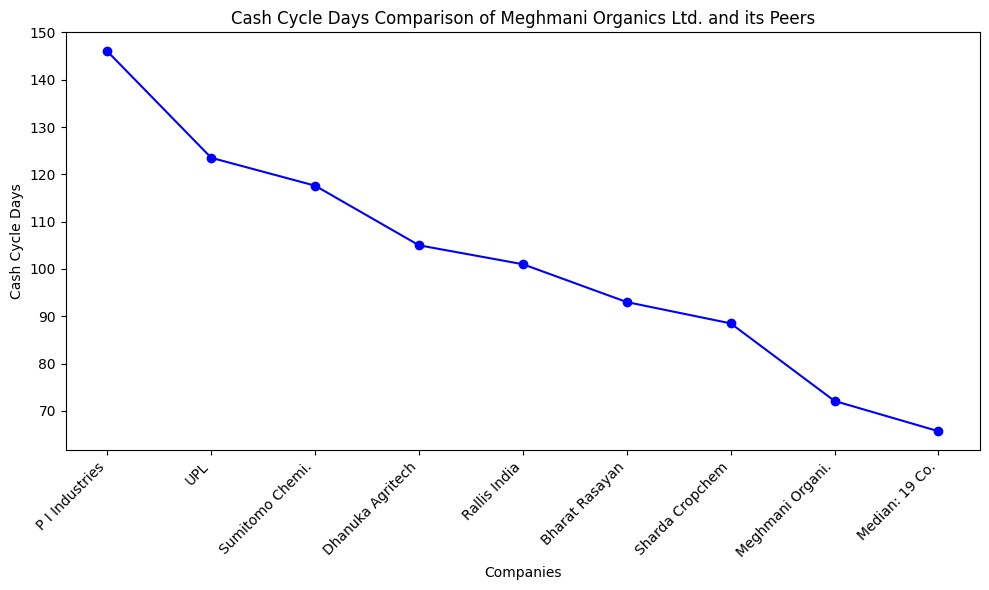

In [84]:
# import matplotlib.pyplot as plt

# # Data from the table (replace with actual data)
# data = {
#     'Company': ['P I Industries', 'UPL', 'Sumitomo Chemi.', 'Dhanuka Agritech', 
#                  'Rallis India', 'Bharat Rasayan', 'Sharda Cropchem', 
#                  'Meghmani Organi.', 'Median: 19 Co.'],
#     'Cash Cycle Days': [117.6, 146.0, 88.5, 123.5, 72.1, 65.7, 101.0, 105.0, 93.0]
# }

# # Sorting the data by Cash Cycle Days for visualization
# sorted_data = sorted(data['Cash Cycle Days'], reverse=True)
# companies = [data['Company'][i] for i in range(len(data['Cash Cycle Days']))
#               if data['Cash Cycle Days'][i] in sorted_data]

# # Creating the line graph
# plt.figure(figsize=(10, 6))
# plt.plot(companies, sorted_data, marker='o', linestyle='-', color='blue')  # Color: blue
# plt.xlabel('Companies')
# plt.ylabel('Cash Cycle Days')
# plt.title('Cash Cycle Days Comparison of Meghmani Organics Ltd. and its Peers')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()

# # Save the graph as an image
# plt.savefig('cash_cycle_days_comparison.png', dpi=200)
# plt.show()

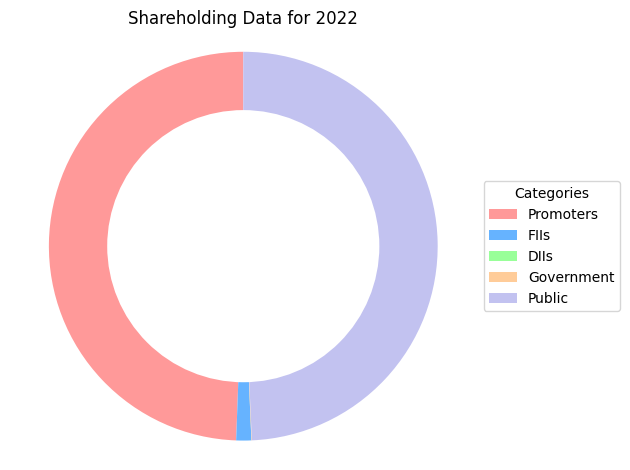

In [91]:
import matplotlib.pyplot as plt

# Data for 2022
labels = ['Promoters', 'FIIs', 'DIIs', 'Government', 'Public']
sizes = [49.41, 1.25, 0.00, 0.04, 49.29]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']

# Create a pie chart
fig, ax = plt.subplots()
wedges, texts = ax.pie(sizes, colors=colors, startangle=90, pctdistance=0.85)

# Draw a circle at the center to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')  

# Set title
plt.title('Shareholding Data for 2022')

# Add legend
ax.legend(wedges, labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Display the pie chart
plt.tight_layout()

# Save the graph as an image
plt.savefig('shareholding-2022.png', dpi=200)
plt.show()


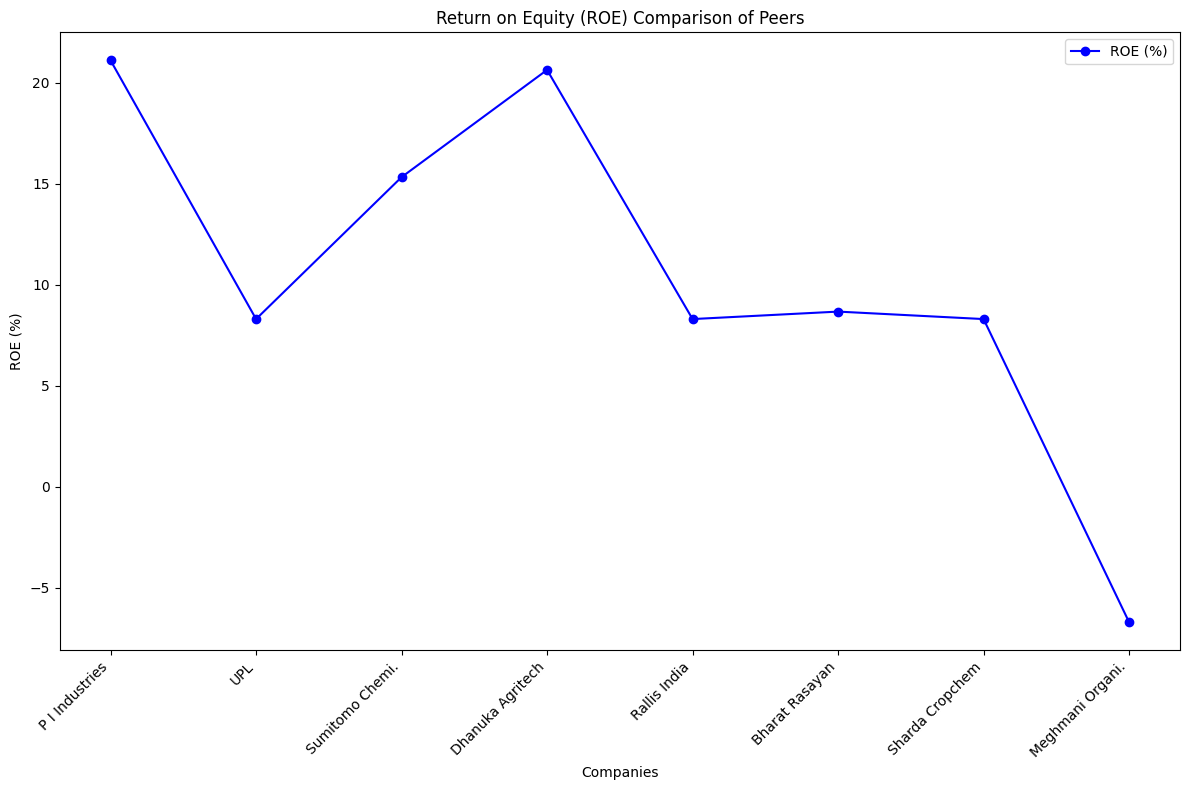

In [93]:
import matplotlib.pyplot as plt

# Data from the markdown table
companies = [
    "P I Industries", "UPL", "Sumitomo Chemi.", "Dhanuka Agritech",
    "Rallis India", "Bharat Rasayan", "Sharda Cropchem", "Meghmani Organi."
]

roe_values = [21.11, 8.30, 15.33, 20.64, 8.30, 8.67, 8.30, -6.71]  # Actual ROE values from the table

# Plotting the line graph
plt.figure(figsize=(12, 8))
plt.plot(companies, roe_values, marker='o', linestyle='-', color='b', label='ROE (%)')

# Adding labels and title
plt.title('Return on Equity (ROE) Comparison of Peers')
plt.xlabel('Companies')
plt.ylabel('ROE (%)')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Removing gridlines
plt.grid(False)

# Display the plot
plt.tight_layout()
plt.savefig('ROE.png', dpi=200)
plt.show()



/tmp/ipykernel_3015034/835567397.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(['0%', '1%', '2%', '3%', '4%', '5%', '6%']) # Set y-axis labels


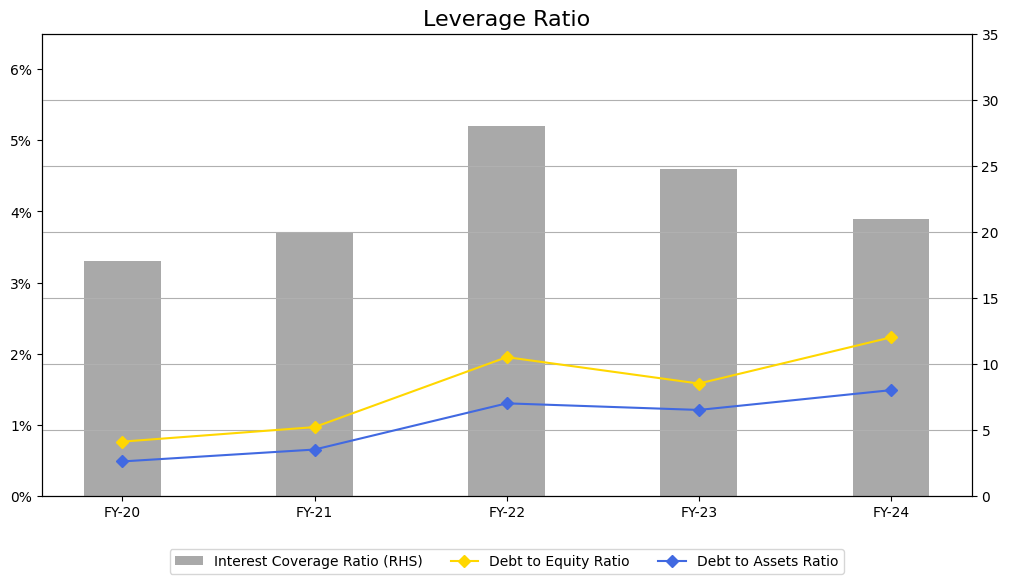

In [114]:
import matplotlib.pyplot as plt

# Data for the bar chart (Interest Coverage Ratio)
years_bar = ['FY-20', 'FY-21', 'FY-22', 'FY-23', 'FY-24'] # will remain constant
interest_coverage = [3.3, 3.7, 5.2, 4.6, 3.9]  

# Data for the line charts 
years_line = ['FY-20', 'FY-21', 'FY-22', 'FY-23', 'FY-24'] # constant
debt_to_equity = [4.1, 5.2, 10.5, 8.5, 12]
debt_to_assets = [2.6, 3.5, 7, 6.5, 8]

# Create the plot and set figure size
fig, ax1 = plt.subplots(figsize=(12, 6))  # Adjust figure size as needed

# Plot the bar chart (Interest Coverage Ratio)
ax1.bar(years_bar, interest_coverage, width=0.4, color='darkgray', label='Interest Coverage Ratio (RHS)')

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot the line charts (Debt to Equity and Debt to Assets)
ax2.plot(years_line, debt_to_equity, marker='D', color='gold', label='Debt to Equity Ratio')
ax2.plot(years_line, debt_to_assets, marker='D', color='royalblue', label='Debt to Assets Ratio')

# Customize the plot
ax1.set_ylabel('')  # Remove y-label for the bar chart
ax1.set_ylim(0, 6.5)  # Set y-axis limits for bar chart
ax1.set_yticklabels(['0%', '1%', '2%', '3%', '4%', '5%', '6%']) # Set y-axis labels
ax2.set_ylim(0, 35)  # Set y-axis limits for line chart 

# Set the plot title
plt.title('Leverage Ratio', fontsize=16)

plt.grid(False)

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3) 

# Display the plot
plt.grid(axis='y')  # Add horizontal grid lines
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Data for the bar charts 
years_bar = ['FY-20', 'FY-21', 'FY-22', 'FY-23', 'FY-24']
earnings_per_share = [52, 60, 61, 84, 118]
dividend_per_share = [6, 8, 11, 19, 29]

# Data for the line charts
price_to_earnings = [35, 57, 93, 82, 51]
ev_to_ebitda = [23, 45, 65, 54, 76]
ev_to_net_sales = [3, 4, 4, 5, 6]

# Create the plot and set figure size
fig, ax1 = plt.subplots(figsize=(12, 7))  # Increased figure height

# Plot the bar charts
width = 0.35 
ax1.bar(years_bar, earnings_per_share, width, color='gold', label='Earnings Per Share')
ax1.bar([x + width for x in range(len(years_bar))], dividend_per_share, width, color='royalblue', label='Dividend Per Share')

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot the line charts 
ax2.plot(years_bar, price_to_earnings, marker='o', color='coral', label='Price to Earnings Ratio (RHS)')
ax2.plot(years_bar, ev_to_ebitda, marker='o', color='steelblue', label='EV / EBITDA (RHS)')
ax2.plot(years_bar, ev_to_net_sales, marker='o', color='olivedrab', label='EV / Net Sales (RHS)')

# Customize the plot
ax1.set_ylabel('') 
ax2.set_ylabel('')
ax1.set_ylim(0, 140)  
ax2.set_ylim(0, 110)  # Slightly increased upper limit for the second y-axis

# Set the plot title
plt.title('Investor Ratios', fontsize=16)

# Add a legend with adjusted position
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper center', 
           bbox_to_anchor=(0.5, -0.2), ncol=3)  # Further adjusted position 

# Adjust plot layout to prevent labels from overlapping
plt.subplots_adjust(top=0.9, bottom=0.2)  # Adjusted top and bottom margins

# Display the plot
plt.grid(axis='y') 
plt.show()

In [138]:
oai_client = AzureOpenAI(
        azure_endpoint="https://harshith-gpt4o.openai.azure.com/",
        api_version="2024-02-01",
        api_key="c0c736e92d0047ad94d66aea592c1e29"
    )

# data = oai_client.chat.completions.create(
#     model="azure/gpt4o-dev",
#     api_key = "c0c736e92d0047ad94d66aea592c1e29",
#     api_version = "2024-02-01",
#     azure_endpoint = "https://harshith-gpt4o.openai.azure.com/",
#     temperature=0.0,
#     messages=messages
# )

In [145]:
raw_tables =  """---- Table # 1 ----\nMarket Cap | ₹ 2,119 Cr.\nCurrent Price | ₹ 83.3\nHigh / Low | ₹ 104 / 71.4\nStock P/E | \nBook Value | ₹ 61.5\nDividend Yield | 1.68 %\nROCE | -1.42 %\nROE | -3.59 %\nFace Value | ₹ 1.00\nAdd ratio to table | \neg. Promoter holding | EDIT RATIOS",
    "---- Table # 2 ----\nS.No. | Name | CMP Rs. | P/E | Mar Cap Rs.Cr. | Div Yld % | NP Qtr Rs.Cr. | Qtr Profit Var % | Sales Qtr Rs.Cr. | Qtr Sales Var % | ROCE %\n1. | P I Industries | 3790.00 | 34.28 | 57501.20 | 0.40 | 369.50 | 31.68 | 1741.00 | 11.20 | 23.81\n2. | UPL | 572.20 |  | 42949.84 | 1.74 | -80.00 | -118.38 | 14078.00 | -15.03 | 3.31\n3. | Sumitomo Chemi. | 493.30 | 66.58 | 24622.94 | 0.23 | 109.28 | 50.79 | 664.37 | 1.96 | 20.83\n4. | Dhanuka Agritech | 1652.20 | 31.50 | 7530.46 | 0.84 | 59.02 | -9.62 | 368.31 | -0.79 | 27.07\n5. | Rallis India | 334.00 | 43.99 | 6495.22 | 0.72 | -21.00 | 69.57 | 436.00 | -16.63 | 11.20\n6 | Bharat Rasayan | 11658.85 | 59.37 | 4844.58 | 0.01 | 55.91 | 57.66 | 309.62 | 1.22 | 11.28\n7. | Sharda Cropchem | 492.95 | 139.50 | 4447.36 | 1.22 | 143.49 | -27.84 | 1312.05 | -11.46 | 3.36\n8. | Meghmani Organi. | 83.34 |  | 2119.43 | 1.68 | -0.40 | -100.89 | 399.81 | -29.19 | -1.42\n | Median: 20 Co. | 493.12 | 43.99 | 2370.84 | 0.36 | 1.72 | -2.84 | 265.21 | -0.83 | 9.73",
    "---- Table # 3 ----\n | Mar 2021 | Jun 2021 | Sep 2021 | Dec 2021 | Mar 2022 | Jun 2022 | Sep 2022 | Dec 2022 | Mar 2023 | Jun 2023 | Sep 2023 | Dec 2023 | Mar 2024\nSales - | 459.21 | 495.67 | 545.68 | 639.24 | 813.37 | 783.08 | 655.19 | 553.84 | 564.63 | 421.54 | 373.96 | 344.54 | 399.81\nYOY Sales Growth % |  | 68.45% | 28.37% | 43.68% | 77.12% | 57.98% | 20.07% | -13.36% | -30.58% | -46.17% | -42.92% | -37.79% | -29.19%",
    "---- Table # 4 ----\n | Mar | Jun | Sep | Dec | Mar | Jun | Sep | Dec | Mar | Jun | Sep | Dec | Mar\n2021 | 2021 | 2021 | 2021 | 2022 | 2022 | 2022 | 2022 | 2023 | 2023 | 2023 | 2023 | 2024\nExpenses - | 425.42 | 408.28 | 467.93 | 561.84 | 676.48 | 648.96 | 570.37 | 492.46 | 480.96 | 436.64 | 359.16 | 344.90 | 389.69\nMaterial Cost % | 61% | 56% | 57% | 60% | 59% | 56% | 61% | 63% | 58% | 72% | 61% | 65% | 61%\nEmployee Cost % | 5% | 6% | 5% | 4% | 4% | 5% | 4% | 5% | 5% | 6% | 7% | 7% | 6%\nOperating Profit | 33.79 | 87.39 | 77.75 | 77.40 | 136.89 | 134.12 | 84.82 | 61.38 | 83.67 | -15.10 | 14.80 | -0.36 | 10.12\nOPM % | 7.36% | 17.63% | 14.25% | 12.11% | 16.83% | 17.13% | 12.95% | 11.08% | 14.82% | -3.58% | 3.96% | -0.10% | 2.53%\nOther Income - | 18.19 | 28.32 | 21.09 | 26.33 | 26.60 | 37.54 | 25.85 | 23.98 | 8.59 | 6.61 | 12.66 | 9.74 | 13.93\nExceptional items | 0.00 | 0.00 | 6.11 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00\nOther income normal | 18.19 | 28.32 | 14.98 | 26.33 | 26.60 | 37.54 | 25.85 | 23.98 | 8.59 | 6.61 | 12.66 | 9.74 | 13.93\nInterest | -9.15 | 9.45 | -3.53 | -3.33 | 6.75 | 9.34 | -2.84 | 43.33 | 14.58 | 3.91 | 11.56 | 26.27 | 1.69\nDepreciation | 13.75 | 15.30 | 14.58 | 14.86 | 15.25 | 15.83 | 16.07 | 15.83 | 20.37 | 21.36 | 20.45 | 20.87 | 20.46\nProfit before tax | 47.38 | 90.96 | 87.79 | 92.20 | 141.49 | 146.49 | 97.44 | 26.20 | 57.31 | -33.76 | -4.55 | -37.76 | 1.90\nTax % | 25.45% | 25.10% | 26.06% | 26.30% | 24.39% | 22.21% | 24.64% | 31.60% | 21.34% | 25.09% | 20.00% | 27.86% | 121.05%\nNet Profit - | 35.32 | 68.13 | 64.91 | 67.95 | 106.98 | 113.95 | 73.43 | 17.93 | 45.08 | -25.29 | -3.64 | -27.23 | -0.40\nProfit after tax | 35.32 | 68.13 | 64.91 | 67.95 | 106.98 | 113.95 | 73.43 | 17.92 | 45.08 | -25.29 | -3.64 | -27.24 | -0.40\nReported Net Profit | 35.32 | 68.13 | 64.91 | 67.95 | 106.98 | 113.95 | 73.43 | 17.93 | 45.08 | -25.29 | -3.64 | -27.23 | -0.40\nProfit for EPS | 35.32 | 68.13 | 64.91 | 67.95 | 106.98 | 113.95 | 73.43 | 17.93 | 45.08 | -25.29 | -3.64 | -27.23 | -0.40\nExceptional items AT | 0.00 | 0.00 | 4.52 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00\nProfit for PE | 35.32 | 68.13 | 60.39 | 67.95 | 106.98 | 113.95 | 73.43 | 17.93 | 45.08 | -25.29 | -3.64 | -27.23 | -0.40\nEPS in Rs | 7,064.00 | 2.68 | 2.55 | 2.67 | 4.21 | 4.48 | 2.89 | 0.71 | 1.77 | -0.99 | -0.14 | -1.07 | -0.02\nRaw PDF |"""

In [151]:
def crisp_knowledge_graph(system_prompt, raw_tables):
    crisp_kg = oai_client.chat.completions.create(
        messages=[
            {"role": "system", "content": system_prompt },
            {"role": "user", "content": raw_tables }
        ],
        model="gpt4o-dev",
        max_tokens=4096
    )
    return crisp_kg.choices[0].message.content

In [153]:
openAIClient_novis = AzureOpenAI(
    api_key = "add2ae8844844d55bd3e1300ccbc9bc2",
    api_version = "2023-05-15",
    azure_endpoint = "https://openai-service-onfi.openai.azure.com/"
)

In [165]:
table_data = """Table Name: Peers
Columns: ['S.No.', 'Name', 'CMP Rs.', 'P/E', 'Mar Cap Rs.Cr.', 'Div Yld %', 'NP Qtr Rs.Cr.', 'Qtr Profit Var %', 'Sales Qtr Rs.Cr.', 'Qtr Sales Var %', 'ROCE %']
Data:
{'S.No.': '1.', 'Name': 'P I Industries', 'CMP Rs.': '3790.00', 'P/E': '34.28', 'Mar Cap Rs.Cr.': '57501.20', 'Div Yld %': '0.40', 'NP Qtr Rs.Cr.': '369.50', 'Qtr Profit Var %': '31.68', 'Sales Qtr Rs.Cr.': '1741.00', 'Qtr Sales Var %': '11.20', 'ROCE %': '23.81'}
{'S.No.': '2.', 'Name': 'UPL', 'CMP Rs.': '572.20', 'P/E': '', 'Mar Cap Rs.Cr.': '42949.84', 'Div Yld %': '1.74', 'NP Qtr Rs.Cr.': '-80.00', 'Qtr Profit Var %': '-118.38', 'Sales Qtr Rs.Cr.': '14078.00', 'Qtr Sales Var %': '-15.03', 'ROCE %': '3.31'}
{'S.No.': '3.', 'Name': 'Sumitomo Chemi.', 'CMP Rs.': '493.30', 'P/E': '66.58', 'Mar Cap Rs.Cr.': '24622.94', 'Div Yld %': '0.23', 'NP Qtr Rs.Cr.': '109.28', 'Qtr Profit Var %': '50.79', 'Sales Qtr Rs.Cr.': '664.37', 'Qtr Sales Var %': '1.96', 'ROCE %': '20.83'}
{'S.No.': '4.', 'Name': 'Dhanuka Agritech', 'CMP Rs.': '1652.20', 'P/E': '31.50', 'Mar Cap Rs.Cr.': '7530.46', 'Div Yld %': '0.84', 'NP Qtr Rs.Cr.': '59.02', 'Qtr Profit Var %': '-9.62', 'Sales Qtr Rs.Cr.': '368.31', 'Qtr Sales Var %': '-0.79', 'ROCE %': '27.07'}
{'S.No.': '5.', 'Name': 'Rallis India', 'CMP Rs.': '334.00', 'P/E': '43.99', 'Mar Cap Rs.Cr.': '6495.22', 'Div Yld %': '0.72', 'NP Qtr Rs.Cr.': '-21.00', 'Qtr Profit Var %': '69.57', 'Sales Qtr Rs.Cr.': '436.00', 'Qtr Sales Var %': '-16.63', 'ROCE %': '11.20'}
{'S.No.': '6', 'Name': 'Bharat Rasayan', 'CMP Rs.': '11658.85', 'P/E': '59.37', 'Mar Cap Rs.Cr.': '4844.58', 'Div Yld %': '0.01', 'NP Qtr Rs.Cr.': '55.91', 'Qtr Profit Var %': '57.66', 'Sales Qtr Rs.Cr.': '309.62', 'Qtr Sales Var %': '1.22', 'ROCE %': '11.28'}
{'S.No.': '7.', 'Name': 'Sharda Cropchem', 'CMP Rs.': '492.95', 'P/E': '139.50', 'Mar Cap Rs.Cr.': '4447.36', 'Div Yld %': '1.22', 'NP Qtr Rs.Cr.': '143.49', 'Qtr Profit Var %': '-27.84', 'Sales Qtr Rs.Cr.': '1312.05', 'Qtr Sales Var %': '-11.46', 'ROCE %': '3.36'}
{'S.No.': '8.', 'Name': 'Meghmani Organi.', 'CMP Rs.': '83.34', 'P/E': '', 'Mar Cap Rs.Cr.': '2119.43', 'Div Yld %': '1.68', 'NP Qtr Rs.Cr.': '-0.40', 'Qtr Profit Var %': '-100.89', 'Sales Qtr Rs.Cr.': '399.81', 'Qtr Sales Var %': '-29.19', 'ROCE %': '-1.42'}
{'S.No.': '9', 'Name': 'Median: 20 Co.', 'CMP Rs.': '493.12', 'P/E': '43.99', 'Mar Cap Rs.Cr.': '2370.84', 'Div Yld %': '0.36', 'NP Qtr Rs.Cr.': '1.72', 'Qtr Profit Var %': '-2.84', 'Sales Qtr Rs.Cr.': '265.21', 'Qtr Sales Var %': '-0.83', 'ROCE %': '9.73'}"""

In [169]:
tabl_data = "---- Table # 5 ----\nProfit & Loss |  |  | RELATED PARTY | PRODUCT SEGMENTS\nStandalone Figures in Rs. Crores / View Consolidated\n | Mar 2020 | Mar 2021 | Mar 2022 | Mar 2023 | Mar 2024\nSales - | 693 | 1,623 | 2,494 | 2,557 | 1,540\nSales Growth % |  | 134.19% | 53.62% | 2.52% | -39.77%\nExpenses - | 589 | 1,343 | 2,114 | 2,192 | 1,529\nMaterial Cost % - | 59% | 55% | 58% | 59% | 65%\nRaw material cost | 398 | 965 | 1,609 | 1,530 | 918\nChange in inventory | -8 | 68 | 155 | 14 | -84\nManufacturing Cost % | 14% | 12% | 13% | 14 % | 18%\nEmployee Cost % | 5% | 6% | 5% | 5% | 7%\nOther Cost % | 7% | 9% | 9% | 8% | 9%\nOperating Profit | 104 | 281 | 380 | 365 | 10\nOPM % | 15% | 17% | 15% | 14% | 1%\nOther Income - | 138 | 30 | 102 | 95 | 42",

In [220]:
## for all table data
def generate_table_data(
openAIClient_novis,
data_type,
table_data,
systemPrompt = """
You are a helpful AI assistant that can extract and structure the required {data_type} from tables for generating financial graphs.
You will be provided with table data in the following format:

---- Table # <number> ----
<table_name>
<column_1> | <column_2> | <column_3> | ...
<row_1_value_1> | <row_1_value_2> | <row_1_value_3> | ...
<row_2_value_1> | <row_2_value_2> | <row_2_value_3> | ...
...

Instructions:
1. Your task is to extract ONLY THE specific data points as given by the user FROM THE LIST - {data_type} from the table to create lists suitable for plotting graphs. DO NOT RETURN data for any other type.
2. For values in thousands such as '1,227' DO NOT RETURN COMMAS, but return the number as '1227'.

For example:
If the user wants to plot a line chart of data_type = ['P/E' , 'ROCE'] over the years, you need to:

1.  Identify the relevant columns:'P/E Ratio' for each company
2.  Extract the corresponding values from each row.
3.  Return two output lists:
    *   `P/E Ratio`: Containing all values from the 'P/E' column.
    *   `ROCE`: Containing all values from the 'ROCE' column.  


Output Format:
Example : 
```json
{
  "PE Ratio": [34.28, " ", 66.58, 31.50, 43.99, 59.37, 139.50, " ", 43.99]
  "ROCE" : [23.81, 3.31, 20.83, 27.07, 11.20, 11.28, 3.36, -1.42, 9.73]
}
""",
userPrompt = """

Input -
Table Data - 
{table_data}
---
Data Type - 
{data_type}
---

Output-
A List of the required data
---
#
""",
useGPT4 = True,
verbose = True
):
    def openAICallStream(openAIClient_novis, message, temperature = 0, verbose = True, useGPT4=True):

        query_answer = ''

        answer = ''
        start_time = time.time()
        if useGPT4:
            model = "onfiGPT-4"
        else:
            model = "onfi-gpt35-16k"

        response = openAIClient_novis.chat.completions.create(
            messages=message,
            model=model,
            temperature=temperature,
            stream = True
        )

        for event in response:
            # STREAM THE ANSWER
            if verbose:
                print(answer, end='', flush=True) # Print the response
            # RETRIEVE THE TEXT FROM THE RESPONSE
            event_text = event.choices[0].delta # EVENT DELTA RESPONSE
            answer = event_text.content # RETRIEVE CONTENT
            if answer is None:
                answer = ''
            query_answer += answer

        # if verbose:
        #     print("\n\n--- %s seconds ---\n" % (time.time() - start_time))

        return query_answer
    #==========================================================================
    message = [
        {"role":"system", "content":systemPrompt},
        {"role":"user", "content":userPrompt.format(data_type=data_type, table_data=table_data)}
    ]
    # if verbose:

    #     print(f"Question: {question}\n\nAnswer: ", end='')

    query_answer = openAICallStream(openAIClient_novis, message, verbose=verbose, useGPT4=useGPT4)
    if verbose:
        print("-----------------------------------------------\n\n")

    # Append the question-answer pair to the list
    # question_answer_pairs.append({query_answer})


    # return question_answer_pairs

In [173]:
table = "---- Table # 9 ----\n | Mar 2020 | Mar 2021 | Mar 2022 | Mar 2023 | Mar 2024\nEquity Capital | 25 | 25 | 25 | 25 | 25\nReserves | 957 | 1,142 | 1,415 | 1,631 | 1,539\nBorrowings - | 264 | 268 | 499 | 696 | 602\nLong term Borrowings | 56 | 123 | 209 | 274 | 179\nShort term Borrowings | 167 | 139 | 285 | 419 | 420\nLease Liabilities | -0 | 6 | 5 | 3 | 2\nOther Borrowings | 41 | -0 | -0 | -0 | -0\nOther Liabilities - | 406 | 532 | 794 | 649 | 623\nTrade Payables | 234 | 339 | 572 | 440 | 477\nAdvance from Customers | 34 | 21 | 43 | 11 | 10\nOther liability items | 139 | 172 | 178 | 198 | 137\nTotal Liabilities | 1,652 | 1,967 | 2,733 | 3,001 | 2,790\nFixed Assets - | 481 | 633 | 735 | 999 | 945\nLand | 43 | 43 | 49 | 49 | 48\nBuilding | 177 | 208 | 236 | 305 | 305\nPlant Machinery | 406 | 573 | 686 | 929 | 954\nEquipments | 5 | 6 | 0 | 0 | 0\nComputers | 2 2 | 2 | 2 | 2 | 3\nFurniture n fittings | 8 | 10 | 14 | 17 | 17"

In [207]:
table_10 = "---- Table # 10 ----\n | Mar 2020 | Mar 2021 | Mar 2022 | Mar 2023 | Mar 2024\nVehicles | 15 | 14 | 14 | 14 | 14\nIntangible Assets | 25 | 25 | 26 | 26 | 27\nOther fixed assets | 1 | 1 | 14 | 22 | 23\nGross Block | 681 | 883 | 1,041 | 1,365 | 1,391\nAccumulated Depreciation | 201 | 249 | 306 | 367 | 446\nCWIP | 101 | 112 | 187 | 145 | 148\nInvestments | 192 | 306 | 348 | 443 | 575\nOther Assets - | 879 | 916 | 1,463 | 1,414 | 1,122\nInventories | 296 | 373 | 628 | 618 | 481\nTrade receivables - | 464 | 406 | 543 | 541 | 433\nReceivables over 6m | 0 | 0 | 17 | 77 | 26\nReceivables under 6m | 478 | 406 | 536 | 473 | 418\nProv for Doubtful | -14 | 0 | -9 | -10 | -10\nCash Equivalents | 8 | 21 | 10 | 29 | 18\nShort term loans | 0 | 0 | 0 | 0 | 0\nOther asset items | 110 | 115 | 281 | 226 | 190\nTotal Assets | 1,652 | 1,967 | 2,733 | 3,001 | 2,790"

In [218]:
##from peer comparison table
query = "what are the P/E ratio, EV/EBITDA, CMP/BV, CMP/FCF, CMP/Sales and Market Values for all peer companies?"
data_type = ["EV/EBITDA","P/E", "CMP/BV", "CMP/FCF", "CMP/Sales", "Market Cap", "5Yrs return %" , "Dividend Yield", "ROCE", "ROA" , "Asset Turnover", "Debt/Equity", "Interest Coverage", "Current Ratio", "Quick Ratio","Inventory Turnover", "Cash Cycle Days"]
generate_table_data(openAIClient_novis, data_type, table_data)

```json
{
  "P/E": ["34.28", " ", "66.58", "31.50", "43.99", "59.37", "139.50", " ", "43.99"],
  "ROCE": ["23.81", "3.31", "20.83", "27.07", "11.20", "11.28", "3.36", "-1.42", "9.73"]
}
```-----------------------------------------------




In [ ]:
#FOR ALL PEER GRAPHS

import matplotlib.pyplot as plt

def plot_financial_data(companies, values, title, y_label, file_name):
    plt.figure(figsize=(12, 8))
    plt.plot(companies, values, marker='o', linestyle='-', color='b', label=y_label)

    # Adding labels and title
    plt.title(title)
    plt.xlabel('Companies')
    plt.ylabel(y_label)
    plt.xticks(rotation=45, ha='right')
    plt.legend()

    # Removing gridlines
    plt.grid(False)

    # Display the plot
    plt.tight_layout()
    plt.savefig(file_name, dpi=200)
    # plt.show()

# List of peer companies (constant)
companies = []

# Data for each financial metric (empty lists as placeholders)
metrics_data = {
    "EV/EBITDA": [],
    "P/E": [],
    "CMP/BV": [],
    "CMP/FCF": [],
    "CMP/Sales": [],
    "Market Cap": [],
    "5Yrs return %": [],
    "Dividend Yield": [],
    "ROCE": [],
    "ROA": [],
    "Asset Turnover": [],
    "Debt/Equity": [],
    "Interest Coverage": [],
    "Current Ratio": [],
    "Quick Ratio": [],
    "Inventory Turnover": [],
    "Cash Cycle Days": []
}

# Titles and axis labels for each financial metric
metrics_info = {
    "EV/EBITDA": ("EV/EBITDA Comparison", "EV/EBITDA", "EV_EBITDA.png"),
    "P/E": ("P/E Ratio Comparison", "P/E Ratio", "PE_Ratio.png"),
    "CMP/BV": ("CMP/BV Ratio Comparison", "CMP/BV Ratio", "CMP_BV_Ratio.png"),
    "CMP/FCF": ("CMP/FCF Ratio Comparison", "CMP/FCF Ratio", "CMP_FCF_Ratio.png"),
    "CMP/Sales": ("CMP/Sales Ratio Comparison", "CMP/Sales Ratio", "CMP_Sales_Ratio.png"),
    "Market Cap": ("Market Cap Comparison", "Market Cap", "Market_Cap.png"),
    "5Yrs return %": ("5-Year Return % Comparison", "5-Yrs Return %", "5Yrs_Return.png"),
    "Dividend Yield": ("Dividend Yield Comparison", "Dividend Yield", "Dividend_Yield.png"),
    "ROCE": ("ROCE Comparison", "ROCE", "ROCE.png"),
    "ROA": ("ROA Comparison", "ROA", "ROA.png"),
    "Asset Turnover": ("Asset Turnover Comparison", "Asset Turnover", "Asset_Turnover.png"),
    "Debt/Equity": ("Debt/Equity Comparison", "Debt/Equity", "Debt_Equity.png"),
    "Interest Coverage": ("Interest Coverage Comparison", "Interest Coverage", "Interest_Coverage.png"),
    "Current Ratio": ("Current Ratio Comparison", "Current Ratio", "Current_Ratio.png"),
    "Quick Ratio": ("Quick Ratio Comparison", "Quick Ratio", "Quick_Ratio.png"),
    "Inventory Turnover": ("Inventory Turnover Comparison", "Inventory Turnover", "Inventory_Turnover.png"),
    "Cash Cycle Days": ("Cash Cycle Days Comparison", "Cash Cycle Days", "Cash_Cycle_Days.png"),
}

# Generate graphs for each financial metric
for metric, (title, y_label, file_name) in metrics_info.items():
    plot_financial_data(companies, metrics_data[metric], title, y_label, file_name)

In [216]:
generate_table_data(openAIClient_novis, data_type, table_data)

```json
{
  "P/E": [34.28, " ", 66.58, 31.50, 43.99, 59.37, 139.50, " ", 43.99],
  "Market Cap": [57501.20, 42949.84, 24622.94, 7530.46, 6495.22, 4844.58, 4447.36, 2119.43, 2370.84]
}
```-----------------------------------------------




In [205]:
# formulae = {"Fixed Asset Turnover Ratio" : "Sales/Average Net Fixed Assets"}
# req_data = {"Sales" : [693, 1623, 2494, 2557, 1540] , "Average Net Fixed Assets" : [481, 633, 735, 999, 945] }

In [213]:
formulae = {"Asset Turnover Ratio" : "Sales/Average Net Total Assets"}
req_data = {"Sales" : [693, 1623, 2494, 2557, 1540] , "Total Assets": [1652, 1967, 2733, 3001, 2790] }

In [212]:
## for ratios graphs

def generate_ratio_data(
openAIClient_novis,
data_type,
req_data,
formulae,
systemPrompt = """
You are a helpful AI assistant that can calculate and return the required data from the given list - {req_data} for generating financial graphs.
You will be provided with the data in the following format:

* A list of the required data - {req_data} you will need to calculate the {data_type}.
* The formulae - {formulae} using which you have to calculate the required {data_type}.

Instructions : 
1. Your task is to CORRECTLY CALCULATE THE REQUIRED FINANCIAL METRIC GIVEN THE FORMULAE.
2. DO NOT RETURN THE STEPS FOR CALCULATION AS PART OF THE OUTPUT. RETURN ONLY THE FINAL LIST OR DICTIONARY.
3. If you are given only a single value for a corresponding list of values, that means THE SINGLE VALUE WILL REMAIN CONSTANT FOR ALL CALCULATIONS, with the other values being taken from the list.
For example - 
In the case of EV/Sales calculation : 
You will be given only the latest EV value, and a list of Sales values. To calculate EV/Sales :
Output = [EV/Sales[0] , EV/Sales[1], ... ]

4. If there is no formulae for a particular metric (e.g Inventory Turnover Ratio), then return the input list of data AS IT IS. 


For example:
If the user wants to plot a chart of data_type = 'Fixed Asset Turnover Ratio' over the years, you will be given :
1.  A dictionary consisting of the data required to calculate the financial metric.
2.  The formula to calculate the metric.
3.  Return one list:
    *   `Fixed Asset Turnover Ratio`: Containing all values of the FINAL calculated fixed assets, using the data values from the list given to you.  
    *   `Fiscal Years`: Containing all values of the fiscal years. This will remain constant - FY 21 ; FY 22 ; FY 23; FY 24

Output Format:
Example : 
```json
{
  "Fixed Asset Turnover Ratio" : [1.44, 2.56, 3.39, 2.56, 1.63]
}
""",
userPrompt = """

Input -
Required Data - 
{req_data}
---
Data Type - 
{data_type}
---
Formulae - 
{formulae}

Output-
ONLY ONE LIST OF THE FINAL CALCULATED DATA
---
#
""",
useGPT4 = True,
verbose = True
):
    def openAICallStream(openAIClient_novis, message, temperature = 0, verbose = True, useGPT4=True):

        query_answer = ''

        answer = ''
        start_time = time.time()
        if useGPT4:
            model = "onfiGPT-4"
        else:
            model = "onfi-gpt35-16k"

        response = openAIClient_novis.chat.completions.create(
            messages=message,
            model=model,
            temperature=temperature,
            stream = True
        )

        for event in response:
            # STREAM THE ANSWER
            if verbose:
                print(answer, end='', flush=True) # Print the response
            # RETRIEVE THE TEXT FROM THE RESPONSE
            event_text = event.choices[0].delta # EVENT DELTA RESPONSE
            answer = event_text.content # RETRIEVE CONTENT
            if answer is None:
                answer = ''
            query_answer += answer

        # if verbose:
        #     print("\n\n--- %s seconds ---\n" % (time.time() - start_time))

        return query_answer
    #==========================================================================
    message = [
        {"role":"system", "content":systemPrompt},
        {"role":"user", "content":userPrompt.format(data_type=data_type, req_data=req_data , formulae=formulae)}
    ]
    # if verbose:

    #     print(f"Question: {question}\n\nAnswer: ", end='')

    query_answer = openAICallStream(openAIClient_novis, message, verbose=verbose, useGPT4=useGPT4)
    if verbose:
        print("-----------------------------------------------\n\n")

    # Append the question-answer pair to the list
    # question_answer_pairs.append({query_answer})


    # return question_answer_pairs

In [204]:
data_type_ratio = "Assets Turnover Ratio"
generate_ratio_data(openAIClient_novis, req_data, formulae, data_type_ratio )

```json
{
  "Asset Turnover Ratio": [0.4195, 0.8255, 0.9123, 0.8517, 0.5520]
}
```-----------------------------------------------




In [ ]:
## For ratio charts
import matplotlib.pyplot as plt

def plot_financial_ratios(years, bar_data, line_data1, line_data2, bar_label, line_label1, line_label2, title, bar_y_label='', bar_y_ticks=None, bar_y_lim=None, line_y_lim=None, file_name='financial_ratios.png'):
    """
    Plots financial ratios using a combination of bar and line charts.

    Args:
    years (list): List of years (x-axis).
    bar_data (list): Data for the bar chart.
    line_data1 (list): Data for the first line chart.
    line_data2 (list): Data for the second line chart.
    bar_label (str): Label for the bar chart.
    line_label1 (str): Label for the first line chart.
    line_label2 (str): Label for the second line chart.
    title (str): Title of the plot.
    bar_y_label (str): Label for the bar chart y-axis (optional).
    bar_y_ticks (list): Custom y-ticks for the bar chart y-axis (optional).
    bar_y_lim (tuple): Y-axis limits for the bar chart (optional).
    line_y_lim (tuple): Y-axis limits for the line charts (optional).
    file_name (str): Name of the file to save the plot (optional).
    """
    # Create the plot and set figure size
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot the bar chart (Interest Coverage Ratio)
    ax1.bar(years, bar_data, width=0.4, color='darkgray', label=bar_label)

    # Create a second y-axis that shares the same x-axis
    ax2 = ax1.twinx()

    # Plot the line charts (Debt to Equity and Debt to Assets)
    ax2.plot(years, line_data1, marker='D', color='gold', label=line_label1)
    ax2.plot(years, line_data2, marker='D', color='royalblue', label=line_label2)

    # Customize the plot
    ax1.set_ylabel(bar_y_label)  # Set y-label for the bar chart
    if bar_y_lim:
        ax1.set_ylim(bar_y_lim)  # Set y-axis limits for bar chart
    if bar_y_ticks:
        ax1.set_yticklabels(bar_y_ticks)  # Set custom y-axis labels for bar chart

    if line_y_lim:
        ax2.set_ylim(line_y_lim)  # Set y-axis limits for line chart 

    # Set the plot title
    plt.title(title, fontsize=16)

    plt.grid(False)

    # Add a legend
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

    # Display the plot
    plt.grid(axis='y')  # Add horizontal grid lines
    plt.tight_layout()
    plt.savefig(file_name, dpi=200)
    plt.show()

# Example usage:
years = ['FY-20', 'FY-21', 'FY-22', 'FY-23', 'FY-24']  # Constant

# Data for Interest Coverage Ratio (Bar Chart)
interest_coverage = [3.3, 3.7, 5.2, 4.6, 3.9]

# Data for Debt to Equity and Debt to Assets Ratios (Line Charts)
debt_to_equity = [4.1, 5.2, 10.5, 8.5, 12]
debt_to_assets = [2.6, 3.5, 7, 6.5, 8]

# Plotting the financial ra


In [ ]:
## first two ratio line charts

import matplotlib.pyplot as plt

def create_line_charts(turnover_data, return_data):


    years = ["FY-20", "FY-21", "FY-22", "FY-23", "FY-24"]

    # Create the first plot (Turnover Ratios)
    plt.figure(figsize=(10, 5)) 
    for label, data in turnover_data.items():
        plt.plot(years, data, label=label)

    plt.title("Turnover Ratio", fontsize=12)
    plt.xlabel("") 
    plt.ylabel("") 
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=3)
    plt.grid(axis="y", linestyle='--', linewidth=0.5)
    plt.show()

    # Create the second plot (Return Ratios)
    plt.figure(figsize=(10, 5)) 
    for label, data in return_data.items():
        plt.plot(years, data, label=label)

    plt.title("Return Ratio (in %)", fontsize=12)
    plt.xlabel("") 
    plt.ylabel("") 
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)
    plt.grid(axis="y", linestyle='--', linewidth=0.5)
    plt.show()

# Example data (replace with your actual data)
turnover_data = {
    "Fixed Assets Turnover Ratio": [],
    "Asset Turnover": [],
    "Debtors Turnover": [],
    "Inventory Turnover": [],
}

return_data = {
    "RoCE (in %)": [],
    "RoE (in %)": [],
}

# Create the charts
create_line_charts(turnover_data, return_data)

In [ ]:
## ratio chart 3 and 4.

import matplotlib.pyplot as plt

def create_financial_charts(leverage_data, liquidity_data):
    years = ["FY-20", "FY-21", "FY-22", "FY-23", "FY-24"]

    # Create the first plot (Leverage Ratios)
    fig, ax1 = plt.subplots(figsize=(10, 5))

    bar_width = 0.2
    ax1.bar(years, leverage_data["Interest Coverage Ratio (RHS)"], 
            width=bar_width, color='gray', label="Interest Coverage Ratio (RHS)")

    ax1.set_ylabel("")
    ax1.tick_params(axis='y')

    ax2 = ax1.twinx()

    for label, data in leverage_data.items():
        if label != "Interest Coverage Ratio (RHS)":
            ax2.plot(years, data, label=label, marker='o')

    ax2.set_ylabel("")
    ax2.tick_params(axis='y')

    plt.title("Leverage Ratio", fontsize=12)
    plt.xticks(years)
    plt.grid(axis="y", linestyle='--', linewidth=0.5)

    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    plt.legend(lines + lines2, labels + labels2, loc="upper center", 
               bbox_to_anchor=(0.5, -0.15), ncol=3)
    plt.show()

    # Call the gen_comments() function here
    gen_comments()

    # Create the second plot (Liquidity Ratios)
    plt.figure(figsize=(10, 5))
    for label, data in liquidity_data.items():
        plt.plot(years, data, label=label, marker='o')

    plt.title("Liquidity Ratio", fontsize=12)
    plt.xticks(years)
    plt.ylabel("")
    plt.grid(axis="y", linestyle='--', linewidth=0.5)
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)
    plt.show()

def gen_comments():
   ...
    
 
leverage_data = {
    "Interest Coverage Ratio (RHS)": [],
    "Debt to Equity Ratio": [],
    "Debt to Assets Ratio": [],
}

liquidity_data = {
    "Current Ratio": [],
    "Quick Ratio": [],
}

# Create the charts and call gen_comments() in between
create_financial_charts(leverage_data, liquidity_data)

In [ ]:
#graph 5 for ratio 

import matplotlib.pyplot as plt

def create_investor_ratios_chart(investor_data):

    years = ["FY-20", "FY-21", "FY-22", "FY-23", "FY-24"]

    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Plot bars for specific ratios on primary y-axis
    bar_width = 0.2
    ax1.bar([x - bar_width for x in range(len(years))], 
            investor_data["Earnings Per Share"], 
            width=bar_width, color='gold', label="Earnings Per Share")
    ax1.bar([x + bar_width for x in range(len(years))], 
            investor_data["Dividend Per Share"], 
            width=bar_width, color='royalblue', label="Dividend Per Share")

    ax1.set_ylabel("")
    ax1.tick_params(axis='y')

    # Create secondary y-axis
    ax2 = ax1.twinx()

    # Plot lines for other ratios on secondary y-axis
    for label, data in investor_data.items():
        if label not in ["Earnings Per Share", "Dividend Per Share"]:
            ax2.plot(years, data, label=label, marker='o')

    ax2.set_ylabel("")
    ax2.tick_params(axis='y')

    plt.title("Investor Ratios", fontsize=12)
    plt.xticks(years)
    plt.grid(axis="y", linestyle='--', linewidth=0.5)

    # Combine legends from both axes
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    plt.legend(lines + lines2, labels + labels2, loc="upper center", 
               bbox_to_anchor=(0.5, -0.25), ncol=3)
    plt.show()


investor_data = {
    "Earnings Per Share": [],
    "Dividend Per Share": [],
    "EV / EBITDA (RHS)": [],
    "EV / Net Sales (RHS)": [],
    "Price to Earnings Ratio (RHS)": [],
}

# Create the chart
create_investor_ratios_chart(investor_data)

In [ ]:
## working capital chart 

import matplotlib.pyplot as plt

def create_working_capital_chart(working_capital_data):

    years = ["FY-20", "FY-21", "FY-22", "FY-23", "FY-24"]

    plt.figure(figsize=(10, 5))

    # Plot lines for each component of working capital
    for label, data in working_capital_data.items():
        plt.plot(years, data, label=label, marker='o')

    plt.title("Working Capital Days", fontsize=12)
    plt.xticks(years)
    plt.ylabel("") 
    plt.grid(axis="y", linestyle='--', linewidth=0.5)
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=4)
    plt.show()


working_capital_data = {
    "Net Cash Cycle days": [],
    "Receivable days": [],
    "Inventory days": [],
    "Payables days": []  # Example: Payables days are zero
}

# Create the chart
create_working_capital_chart(working_capital_data)

In [ ]:
## cash flows chart

import matplotlib.pyplot as plt
import numpy as np

def create_cash_flow_chart(cash_flow_data):
    """
    Creates a chart with a secondary y-axis to display cash flow data.

    Args:
        cash_flow_data (dict): A dictionary containing cash flow data.
            Keys are line labels, values are lists of data points per year.
    """

    years = ["FY-20", "FY-21", "FY-22", "FY-23", "FY-24"]
    categories = ["Cash from Operating Activity", "Cash from Investing Activity", 
                  "Cash from Financing Activity"]

    # Create data for stacked bars
    data_for_stack = np.array([cash_flow_data[category] for category in categories])
    data_cum = data_for_stack.cumsum(axis=0)

    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Plot stacked bars
    for i, category in enumerate(categories):
        ax1.bar(years, cash_flow_data[category], bottom=data_cum[i - 1] if i > 0 else None, 
                label=category)

    ax1.set_ylabel("")
    ax1.tick_params(axis='y')

    # Create secondary y-axis
    ax2 = ax1.twinx()

    # Plot net cash flow line
    ax2.plot(years, cash_flow_data["NET CASH FLOW"], label="NET CASH FLOW", 
             color="gold", marker='o', linewidth=3)

    ax2.set_ylabel("")
    ax2.tick_params(axis='y')

    plt.title("Cash Flow Schedule", fontsize=12)
    plt.xticks(years)
    plt.grid(axis="y", linestyle='--', linewidth=0.5)

    # Combine legends from both axes
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    plt.legend(lines + lines2, labels + labels2, loc="upper center", 
               bbox_to_anchor=(0.5, -0.15), ncol=2)
    plt.show()

# Example data (replace with your actual data)
cash_flow_data = {
    "Cash from Operating Activity": [],
    "Cash from Investing Activity": [],
    "Cash from Financing Activity": [],
    "NET CASH FLOW": []
}

# Create the chart
create_cash_flow_chart(cash_flow_data)

In [ ]:
def generate_comments(
openAIClient_4o,
input_data,
SystemPrompt = """
Generate structured comments based on the presented data, highlighting key points and insights.

Input:
Describe the data source (table, graph, etc.) and the main findings:
- Summarize the key metrics or variables presented.
- Highlight trends observed over time or among different categories/entities.
- Identify significant changes, fluctuations, or outliers in the data.
- Discuss relationships or correlations between variables if applicable.
- Provide conclusions or insights derived from the data analysis.
- The output should be pointwise, covering ALL MAJOR INSIGHTS from the table or graph given to you. 

Output Format:
Example:
- Major cost analysis: "The primary cost component for the company is material costs, comprising 69% of total income, down from 75% three years ago."
- Expense distribution: "Purchase of stock, change in inventories, and subcontracting costs collectively account for around 5% of total expenses."
- Stability in employee expenses: "Employee benefit and wage expenses remain stable at approximately 3% of total income."
- Finance costs increase: "Finance costs have more than doubled in FY-24 due to increased debt in the company's capital structure."
- Consistent depreciation expenses: "Depreciation and amortization expenses have remained stable at around 1% of total income over the past three years."
- Other expenses analysis: "Sales, marketing, advertising, and promotions expenses decreased by 4% in FY-24, reflecting improved brand equity."
- Tax expenses overview: "Tax expenses represent around 3% of total income in FY-24."

Generate structured comments based on the provided data, ensuring each comment provides clear insights and observations relevant to the context.
""",
userPrompt = """

Input -
Table/Graph - 
{input_data}
---

Output-
Comments :
1. 
2. 
3. 
..
---
#
""")

generate_comments(openAIClient_4o, input_data)

In [ ]:
## FOR ALL TABLES, for all table data
def ALL_table_data(
openAIClient_novis,
data_type,
table_data,
systemPrompt = """
You are a helpful AI assistant that can extract and structure the required {data_type} from tables for generating financial graphs.
You will be provided with table data in the following format:

---- Table # <number> ----
<table_name>
<column_1> | <column_2> | <column_3> | ...
<row_1_value_1> | <row_1_value_2> | <row_1_value_3> | ...
<row_2_value_1> | <row_2_value_2> | <row_2_value_3> | ...
...

Instructions:
1. Your task is to extract ONLY THE specific data points as given by the user FROM THE LIST - {data_type} from the table to create lists suitable for plotting graphs. DO NOT RETURN data for any other type.
2. For values in thousands such as '1,227' DO NOT RETURN COMMAS, but return the number as '1227'.

For example:
If the user wants to plot a line chart of data_type = ['Sales' , 'Expenses'] over the years, you need to:

1.  Identify the relevant columns:'P/E Ratio' for each company
2.  Extract the corresponding values from each row.
3.  Return two output lists:
    *   `Sales`: Containing all values from the 'P/E' column.
    *   `Expenses`: Containing all values from the 'ROCE' column.  
    *   `Years` : This remains constant : FY 20 , FY 21, FY 22, FY 23, FY 24.


Output Format:
Example : 
```json
{
  "Sales": []
  "Expenses" : []
  "Years" : ["FY 20", "FY 21", "FY 22", "FY 23", "FY 24"]
}
""",
userPrompt = """

Input -
Table Data - 
{table_data}
---
Data Type - 
{data_type}
---

Output-
A List of ALL required data
---
#
""",
useGPT4 = True,
verbose = True
):
    def openAICallStream(openAIClient_novis, message, temperature = 0, verbose = True, useGPT4=True):

        query_answer = ''

        answer = ''
        start_time = time.time()
        if useGPT4:
            model = "onfiGPT-4"
        else:
            model = "onfi-gpt35-16k"

        response = openAIClient_novis.chat.completions.create(
            messages=message,
            model=model,
            temperature=temperature,
            stream = True
        )

        for event in response:
            # STREAM THE ANSWER
            if verbose:
                print(answer, end='', flush=True) # Print the response
            # RETRIEVE THE TEXT FROM THE RESPONSE
            event_text = event.choices[0].delta # EVENT DELTA RESPONSE
            answer = event_text.content # RETRIEVE CONTENT
            if answer is None:
                answer = ''
            query_answer += answer

        # if verbose:
        #     print("\n\n--- %s seconds ---\n" % (time.time() - start_time))

        return query_answer
    #==========================================================================
    message = [
        {"role":"system", "content":systemPrompt},
        {"role":"user", "content":userPrompt.format(data_type=data_type, table_data=table_data)}
    ]
    # if verbose:

    #     print(f"Question: {question}\n\nAnswer: ", end='')

    query_answer = openAICallStream(openAIClient_novis, message, verbose=verbose, useGPT4=useGPT4)
    if verbose:
        print("-----------------------------------------------\n\n")

    # Append the question-answer pair to the list
    # question_answer_pairs.append({query_answer})


    # return question_answer_pairs